# Cardiovascular Disease Prediction Project
---

## Project Description
In this project, a machine learning model will be developed to predict cardiovascular diseases. The provided dataset contains various patient attributes and information about their cardiovascular disease status. The goal is to perform the necessary data preprocessing and feature engineering steps to improve the disease prediction accuracy using this dataset.

---

Dataset: [Heart Disease Dataset](https://archive.ics.uci.edu/dataset/45/heart+disease)


```pip install ucimlrepo```

```
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
# metadata 
print(heart_disease.metadata) 
# variable information 
print(heart_disease.data.variables)
heart_disease.variables)
```

**Explanation of Dataset Features:**

1. **Age** - Contains numerical information about the person's age.
2. **Sex** - Indicates the person's gender (1 = male; 0 = female).
3. **Chest Pain Type (4 values)** - Indicates the type of chest pain (1: Typical angina, 2: Atypical angina, 3: Non-anginal pain, 4: Asymptomatic).
4. **Resting Blood Pressure** - Resting blood pressure (in mm Hg).
5. **Serum Cholesterol in mg/dl** - Serum cholesterol level (in mg/dl).
6. **Fasting Blood Sugar > 120 mg/dl** - Is the fasting blood sugar level greater than 120 mg/dl (1 = true; 0 = false).
7. **Resting ECG results (values 0, 1, 2)** - Resting electrocardiogram results (0: Normal, 1: ST-T wave abnormalities, 2: Left ventricular hypertrophy or T wave inversion).
8. **Maximum Heart Rate achieved** - Maximum heart rate achieved.
9. **Exercise Induced Angina** - Exercise-induced angina (1 = yes; 0 = no).
10. **ST depression induced by exercise relative to rest** - ST segment depression induced by exercise relative to rest.
11. **Slope of the peak exercise ST segment** - Slope of the peak exercise ST segment (1: Upsloping, 2: Flat, 3: Downsloping).
12. **Number of major vessels (0-3) colored by fluoroscopy** - Number of major vessels colored by fluoroscopy (between 0-3).
13. **Thal** - Thalassemia status (3 = normal; 6 = fixed defect; 7 = reversible defect).


---

**Target variable**: Presence of heart disease - Indicates whether the person has heart disease (1 = disease; 0 = no disease).


---

**Numerical and Categorical Features**

**Numerical Features**
- age: integer
- resting_blood_pressure: integer
- serum_cholesterol: integer
- maximum_heart_rate_achieved
- st_depression_induced_by_exercise
- number_major_vessels

**Categorical Features**
- sex
- chest_pain_type
- fasting_blood_sugar
- resting_ecg_results
- exercise_induced_angina
- thal
- slope_peak_exercise_st_segment
- presence_of_heart_disease (Target)


---

### Tech Stack:

- Programming Language: `Python`   
      
- Model tracking: `MLflow`
  
- Fronthand: `Gradio`
  
- Backend: `FastAPI`
  
- Versiyon kontrol: `Git`

## Installation:
```
git clone https://github.com/kntvrl/kodlasam_hearth_disease_project.git
cd kodlasam_hearth_disease_project
pythom -m venv venv
pip install -r requirements.txt
python hearth_app.py
```


In [200]:
import warnings
from ucimlrepo import fetch_ucirepo 
from typing import Tuple, Callable, Union
from sklearn.base import BaseEstimator
from sklearn.model_selection import BaseCrossValidator
warnings.filterwarnings("ignore")
%matplotlib inline
import missingno as msno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.sklearn
import mlflow.pyfunc
from sklearn.model_selection import train_test_split,StratifiedKFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder, MinMaxScaler, StandardScaler, FunctionTransformer, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, roc_auc_score, roc_curve,auc, confusion_matrix, make_scorer
from imblearn.over_sampling import SMOTE
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None)
plt.style.use("ggplot")
sns.set_palette(sns.diverging_palette(220, 20))

# Data Loading & Cleaning

- First, the data was downloaded from the source, then the features were compared and validated against the features listed in the project word document, and the feature names from the project word document were assigned to the dataset.

- The data from the source was converted into a dataframe. After the column names were assigned, the data was saved again as a CSV file named raw_df. The purpose here is to read the data from the CSV file instead of downloading it from the internet again if the notebook is run from the beginning.


- Download dataset

In [201]:
# heart_disease = fetch_ucirepo(id=45)
# X = heart_disease.data.features 
# y = heart_disease.data.targets 
# df = pd.concat([X, y], axis=1)
# print("Veri seti boyutu")
# print(heart_disease.data.features.shape)
# print(heart_disease.data.targets.shape)
# print("---------------------------------")
# print("Tyepes and names of features:")
# print(df.info())

- Organizing the column names according to the project's requirements

In [202]:
# columns_rename_dict={
#     "age":"age",
#     "sex":"sex",
#     "cp":"chest_pain_type",
#     "trestbps":"resting_blood_pressure",
#     "chol":"serum_cholesterol",
#     "fbs":"fasting_blood_sugar",
#     "restecg":"resting_ecg_results",
#     "thalach":"maximum_heart_rate_achieved",
#     "exang":"exercise_induced_angina",
#     "oldpeak":"st_depression_induced_by_exercise",
#     "slope":"slope_peak_exercise_st_segment",
#     "ca":"number_major_vessels",
#     "thal":"thal",
#     "num":"presence_of_heart_disease"
# }
# df = df.rename(columns=columns_rename_dict)

# Target feature encoded as binary
# df["presence_of_heart_disease"] = np.where(df["presence_of_heart_disease"] > 1, 1, 0)


- **The target variable, "Presence of heart disease," consists of 5 classes. During the live session, it was requested that this variable be considered as 0 and 1. Therefore, it was specified that values greater than 1 should also be treated as 1, and the target has been adjusted accordingly.**

- **Categorical variables that require one-hot encoding were identified in the later stages of this notebook.**

- **Since label values need to be assigned to the data for deployment, the encoding of these numerical categorical variables has been moved to this section for labeling.**

**After the adjustments, the raw data has been saved as a CSV file.**


In [203]:
# chest_pain_type_dict = {
#     1 :"cp_typical_angina",
#     2 :"cp_atypical_angina",
#     3 :"cp_non_anginal_pain",
#     4: "cp_asymptomatic"
# }
# df["chest_pain_type"] = df["chest_pain_type"].map(chest_pain_type_dict)

# ecg_results_dict = {
#     0: "ecg_normal",
#     1: "ecg_st_t_wave_abnormality",
#     2: "ecg_left_ventricular_hypertrophy"
# }
# df["resting_ecg_results"] = df["resting_ecg_results"].map(ecg_results_dict)

# thal_dict = {
#     3: "thal_normal",
#     6: "thal_fixed_defect",
#     7: "thal_reversable_defect"
# }
# df["thal"] = df["thal"].map(thal_dict)

# slope_dict = {
#     1: "slope_upsloping",
#     2: "slope_flat",
#     3: "slope_downsloping"
# }
# df["slope_peak_exercise_st_segment"] = df["slope_peak_exercise_st_segment"].map(slope_dict)

# df.to_csv("raw_heart_disease_data.csv", index=False)

**Loading from local**

In [204]:
df = pd.read_csv("raw_heart_disease_data.csv")
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_ecg_results,maximum_heart_rate_achieved,exercise_induced_angina,st_depression_induced_by_exercise,slope_peak_exercise_st_segment,number_major_vessels,thal,presence_of_heart_disease
0,63,1,cp_typical_angina,145,233,1,ecg_left_ventricular_hypertrophy,150,0,2.3,slope_downsloping,0.0,thal_fixed_defect,0
1,67,1,cp_asymptomatic,160,286,0,ecg_left_ventricular_hypertrophy,108,1,1.5,slope_flat,3.0,thal_normal,1
2,67,1,cp_asymptomatic,120,229,0,ecg_left_ventricular_hypertrophy,129,1,2.6,slope_flat,2.0,thal_reversable_defect,0
3,37,1,cp_non_anginal_pain,130,250,0,ecg_normal,187,0,3.5,slope_downsloping,0.0,thal_normal,0
4,41,0,cp_atypical_angina,130,204,0,ecg_left_ventricular_hypertrophy,172,0,1.4,slope_upsloping,0.0,thal_normal,0


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                303 non-null    int64  
 1   sex                                303 non-null    int64  
 2   chest_pain_type                    303 non-null    object 
 3   resting_blood_pressure             303 non-null    int64  
 4   serum_cholesterol                  303 non-null    int64  
 5   fasting_blood_sugar                303 non-null    int64  
 6   resting_ecg_results                303 non-null    object 
 7   maximum_heart_rate_achieved        303 non-null    int64  
 8   exercise_induced_angina            303 non-null    int64  
 9   st_depression_induced_by_exercise  303 non-null    float64
 10  slope_peak_exercise_st_segment     303 non-null    object 
 11  number_major_vessels               299 non-null    float64

**The data consists of 14 columns, including 13 features and one target feature, with 303 rows.**


In [206]:
df.shape

(303, 14)

**Missing Data Handling**
- Missing data has been detected in the "number_major_vessels" (4 missing values) and "thal" (2 missing values) columns.
- According to the widely accepted 5% rule for missing data in datasets, if the proportion of missing data is less than 5% of the dataset, removing these missing values is generally a common approach.

- In the heart-disease dataset, this proportion is approximately 1.98%, so the missing values have been cleaned.
$$
\text{Missing data rate} = \left(\frac{6}{303}\right) \times 100 \approx 1.98\%
$$



<Axes: >

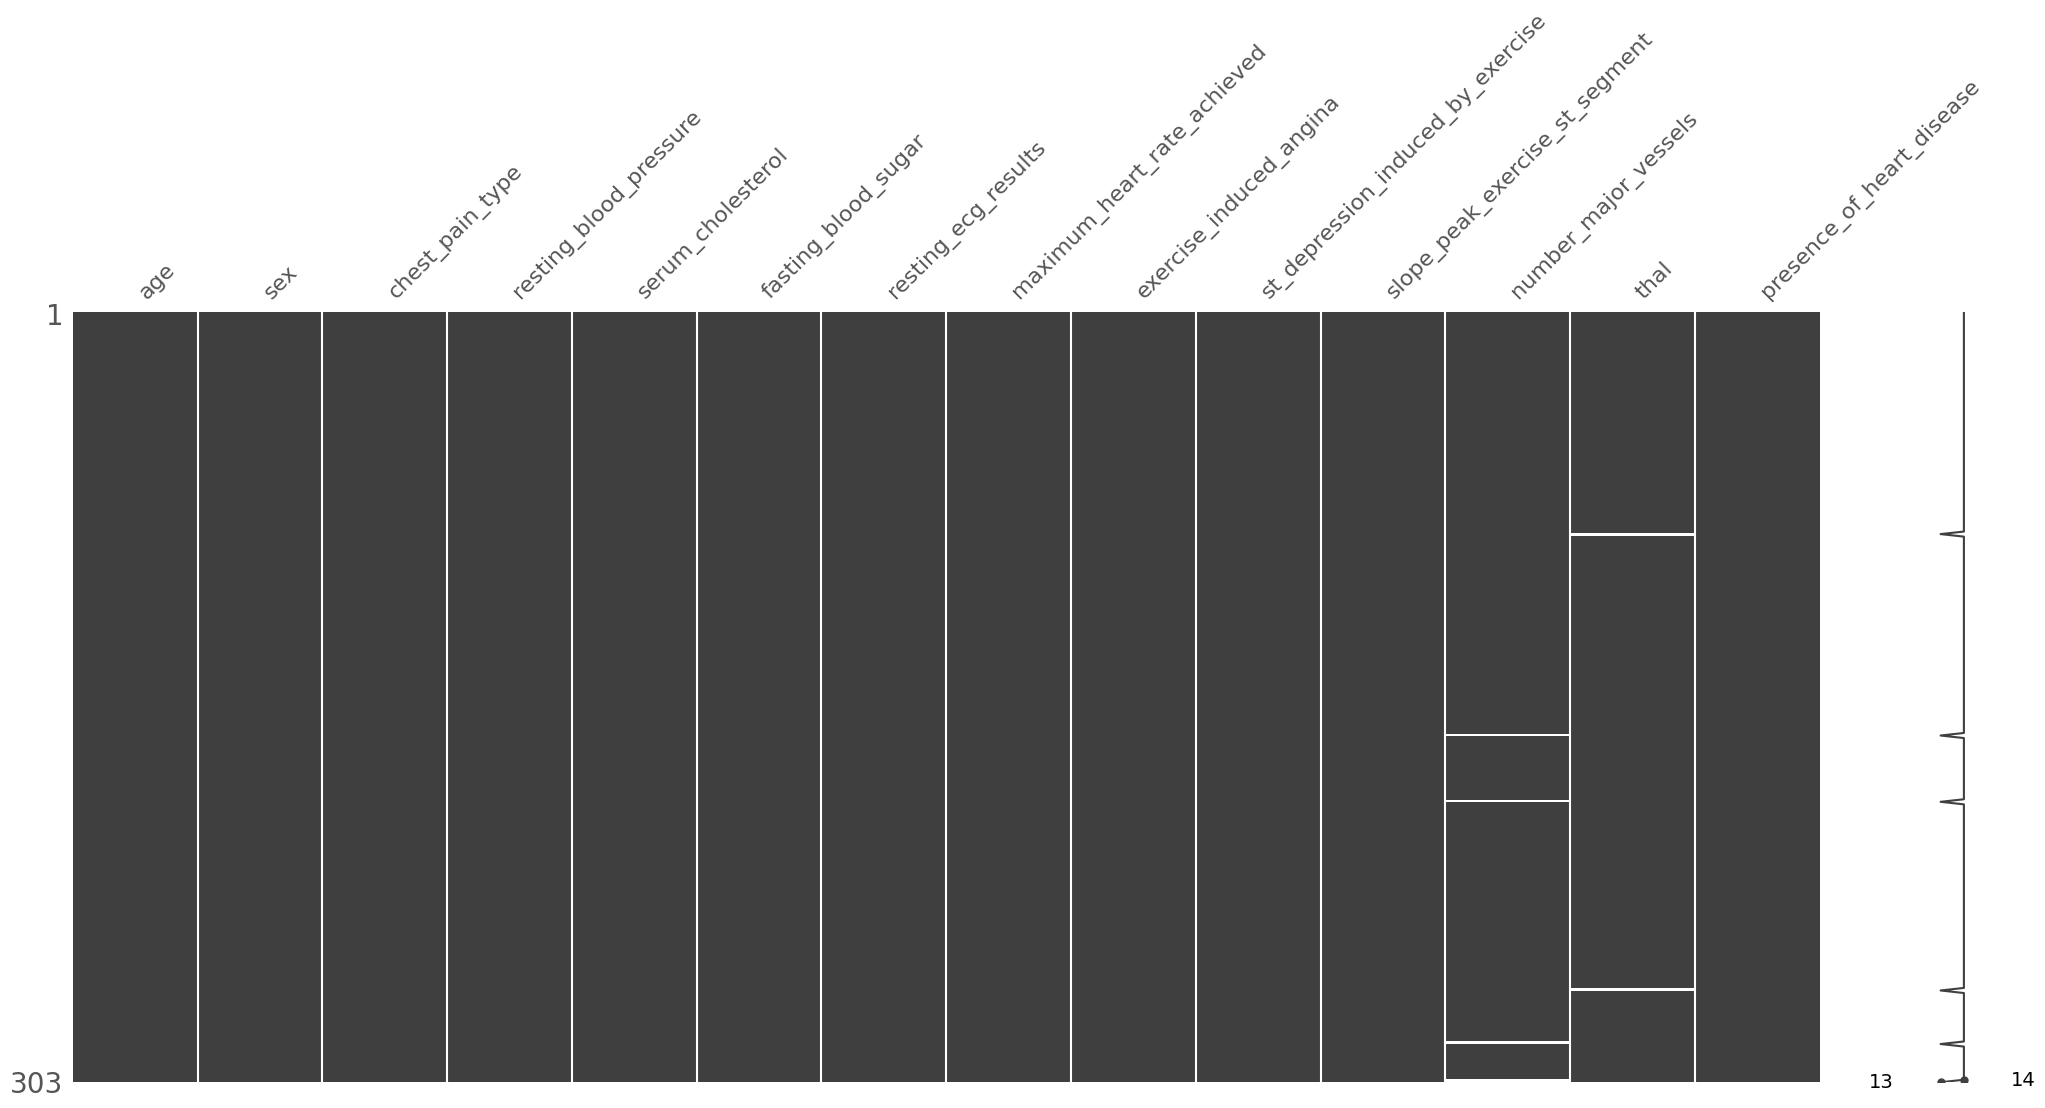

In [207]:
msno.matrix(df)

In [208]:
df.isnull().sum()

age                                  0
sex                                  0
chest_pain_type                      0
resting_blood_pressure               0
serum_cholesterol                    0
fasting_blood_sugar                  0
resting_ecg_results                  0
maximum_heart_rate_achieved          0
exercise_induced_angina              0
st_depression_induced_by_exercise    0
slope_peak_exercise_st_segment       0
number_major_vessels                 4
thal                                 2
presence_of_heart_disease            0
dtype: int64

In [209]:
def clean_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Clean the input dataframe by removing missing values and duplicates.
    
    Parameters
    ----------
    df : pandas.DataFrame
        The input dataframe to be cleaned.
    
    Returns
    -------
    pandas.DataFrame
        The cleaned dataframe with missing values and duplicates removed.
    """
    # Drop missing values and duplicates
    df.dropna(inplace=True)
    df.drop_duplicates(inplace=True)
    
    return df


**Duplicate Data Check**
- There is no duplicate data in the dataset.


In [210]:
df[df.duplicated(keep=False)]

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_ecg_results,maximum_heart_rate_achieved,exercise_induced_angina,st_depression_induced_by_exercise,slope_peak_exercise_st_segment,number_major_vessels,thal,presence_of_heart_disease


**Cleaning Missing Data**


In [211]:
clean_data(df)
df.isnull().sum()

age                                  0
sex                                  0
chest_pain_type                      0
resting_blood_pressure               0
serum_cholesterol                    0
fasting_blood_sugar                  0
resting_ecg_results                  0
maximum_heart_rate_achieved          0
exercise_induced_angina              0
st_depression_induced_by_exercise    0
slope_peak_exercise_st_segment       0
number_major_vessels                 0
thal                                 0
presence_of_heart_disease            0
dtype: int64

**Detection of Outliers**

- Before detecting outliers, the plotting function was defined and the provided data was analyzed.

- Since there is no object or categorical data type in the dataset, the visualizations were written for numerical data. For distributions, histograms and kdeplot are drawn, and for outlier detection, boxplots are used.

- The distributions have been examined.

- A function was written to detect the lower and upper limits of outliers using the IQR method. For each numerical feature in the dataset, the function returns the lower and upper limits based on the entered threshold. Additionally, a function was written to suppress the detected outliers. Helper functions were also created to display the describe and outliers.

- The detected outliers were suppressed by either the lower or upper limit values.

- The classes of numerical categorical variables were checked and validated in the dataset.


**Helper functions**

In [212]:
def plot_features(df: pd.DataFrame, types: list = ["int64", "float64"]) -> None:
    """
    Plots histograms, boxplots, and kernel density plots for numerical features in the dataframe.
    
    Parameters
    ----------
    df : pandas.DataFrame
        The input dataframe containing the data.
    types : list, optional
        The list of data types to consider for plotting (default is ["int64", "float64"]).
    
    Returns
    -------
    None
        This function does not return any value. It directly displays the plots.
    """
    # Select numeric columns based on specified types
    numeric_columns = [col for col in df.columns if df[col].dtype in types]
    
    # Loop through each numeric column and plot its distribution
    for i in numeric_columns:
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
        
        # Histogram
        sns.histplot(x=df[i], bins=10, ax=axes[0])
        axes[0].set_title(f"Histogram of {i}")
        
        # Boxplot
        sns.boxplot(x=df[i], ax=axes[1])
        axes[1].set_title(f"Boxplot of {i}")
        
        # KDE plot
        sns.kdeplot(x=df[i], ax=axes[2])
        axes[2].set_title(f"KDE of {i}")
        
        # Show the plots
        plt.show()

In [213]:
def custom_barplot(df: pd.DataFrame, categoric_value: str, numeric_value: str, agg_func: str) -> pd.DataFrame:
    """
    Creates a custom bar plot for a numeric feature grouped by a categorical feature.
    
    The plot displays the aggregated numeric values for each category, sorted by the 
    aggregation result in descending order. The function also returns the aggregated 
    data in a sorted dataframe.
    
    Parameters
    ----------
    df : pandas.DataFrame
        The input dataframe containing the data.
    categoric_value : str
        The categorical feature to group by.
    numeric_value : str
        The numeric feature to aggregate and plot.
    agg_func : str
        The aggregation function to apply (e.g., 'mean', 'sum', etc.).
    
    Returns
    -------
    pandas.DataFrame
        A dataframe containing the aggregated values, sorted by the numeric feature.
    """
    # Group by the categorical value and aggregate the numeric value using the specified function
    sorted_df = df.groupby(categoric_value)[numeric_value].agg(agg_func).reset_index().sort_values(numeric_value, ascending=False)
    
    # Create the bar plot
    sns.barplot(x=categoric_value, y=numeric_value, data=df, estimator=agg_func, order=sorted_df[categoric_value], ci=False)
    plt.xticks(rotation=90)
    plt.show()
    
    # Return the sorted aggregated dataframe
    return sorted_df

In [214]:

def outlier_thresholds(df: pd.DataFrame, variable: str, q1_thr: float = 0.25, q3_thr: float = 0.75) -> tuple:
    """
    Calculate the outlier thresholds for a given variable in a dataframe using the Interquartile Range (IQR) method.

    The function computes the lower and upper limits to detect outliers based on the specified quantiles 
    (by default, 25th and 75th percentiles). Any values outside these limits are considered outliers.

    Parameters
    ----------
    df : pandas.DataFrame
        The input dataframe containing the data.
    variable : str
        The name of the variable (column) for which to calculate the outlier thresholds.
    q1_thr : float, optional
        The lower quantile threshold (default is 0.25, which represents the 25th percentile).
    q3_thr : float, optional
        The upper quantile threshold (default is 0.75, which represents the 75th percentile).

    Returns
    -------
    tuple
        A tuple containing the lower and upper outlier thresholds.
    """
    # Calculate the first and third quartiles
    quartile1 = df[variable].quantile(q1_thr)
    quartile3 = df[variable].quantile(q3_thr)
    
    # Compute the Interquartile Range (IQR)
    interquantile_range = quartile3 - quartile1
    
    # Calculate the upper and lower limits for outliers
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    
    # Print the limits
    print(f"low_limit: {low_limit}, up_limit: {up_limit}")
    
    # Return the calculated limits
    return low_limit, up_limit


In [215]:
def replace_with_thresholds(df: pd.DataFrame, variable: str) -> pd.DataFrame:
    """
    Replace outlier values in a dataframe column with the corresponding upper or lower limits
    based on the Interquartile Range (IQR) method.

    The function uses the outlier thresholds (calculated using the `outlier_thresholds` function)
    to replace values in the specified column that are above the upper threshold or below the 
    lower threshold with the respective limits.

    Parameters
    ----------
    df : pandas.DataFrame
        The input dataframe containing the data.
    variable : str
        The name of the variable (column) where outliers will be replaced.

    Returns
    -------
    pandas.DataFrame
        The dataframe with outliers replaced by the calculated thresholds.
    """
    # Get the low and up limits for outlier detection
    low_limit, up_limit = outlier_thresholds(df, variable)
    
    # Count how many values are above the upper limit and below the lower limit
    num_replacements_upper = df[df[variable] > up_limit][variable].count()
    num_replacements_lower = df[df[variable] < low_limit][variable].count()
    
    # Replace outliers with respective limits
    df.loc[df[variable] > up_limit, variable] = up_limit
    if df[variable].min() > 0:  # Check if the minimum value is positive
        df.loc[df[variable] < low_limit, variable] = low_limit
    
    # Print how many values were replaced
    print(f"{num_replacements_upper} values replaced with the upper limit, "
          f"{num_replacements_lower} values replaced with the lower limit.")
    
    # Return the modified dataframe
    return df


In [216]:
def describe_feature(df: pd.DataFrame, feature: str) -> pd.DataFrame:
    """
    Returns the summary statistics of a given feature and prints its data type.

    Parameters
    ----------
    df : pandas.DataFrame
        DataFrame containing the data.
    feature : str
        The column name for which the summary will be provided.

    Returns
    -------
    pandas.DataFrame
        Summary statistics of the specified feature.
    """
    print(f"Data type: {df[feature].dtypes}")
    return df[[feature]].describe().T


In [217]:
def describe_categorical_feature(df: pd.DataFrame, feature: str, normalize: bool = False) -> pd.DataFrame:
    """
    Returns the count of unique values for a categorical feature and its data type.

    Parameters
    ----------
    df : pandas.DataFrame
        The input DataFrame containing the data.
    feature : str
        The column name for which the unique value counts will be provided.
    normalize : bool, optional
        If True, the counts will be normalized to show proportions, by default False.

    Returns
    -------
    pandas.DataFrame
        A DataFrame containing the counts (or proportions) of unique values for the specified feature.
    """
    print(f"Data type: {df[feature].dtypes}")
    return df[feature].value_counts(normalize=normalize).reset_index()


In [218]:
def show_outliers(df: pd.DataFrame, feature: str, low_limit: float, up_limit: float, head_num: int = 5) -> pd.DataFrame:
    """
    Displays the outliers in a specified feature of a DataFrame based on the provided lower and upper limits.

    Parameters
    ----------
    df : pandas.DataFrame
        The input DataFrame containing the data.
    feature : str
        The column name to check for outliers.
    low_limit : float
        The lower threshold for detecting outliers.
    up_limit : float
        The upper threshold for detecting outliers.
    head_num : int, optional
        The number of outlier records to return, by default 5.

    Returns
    -------
    pandas.DataFrame
        A DataFrame containing the first few outlier records.
    """
    df = df[(df[feature] < low_limit) | (df[feature] > up_limit)]
    print(f"There are {len(df)} outliers in the dataset.")
    return df.head(head_num)


**Numerical Features**

In [219]:
numeric_features = [
    "age",
    "resting_blood_pressure",
    "serum_cholesterol",
    "maximum_heart_rate_achieved",
    "st_depression_induced_by_exercise",
    "number_major_vessels"
]

In [220]:
df[numeric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
resting_blood_pressure,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
serum_cholesterol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
maximum_heart_rate_achieved,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
st_depression_induced_by_exercise,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2
number_major_vessels,297.0,0.676768,0.938965,0.0,0.0,0.0,1.0,3.0


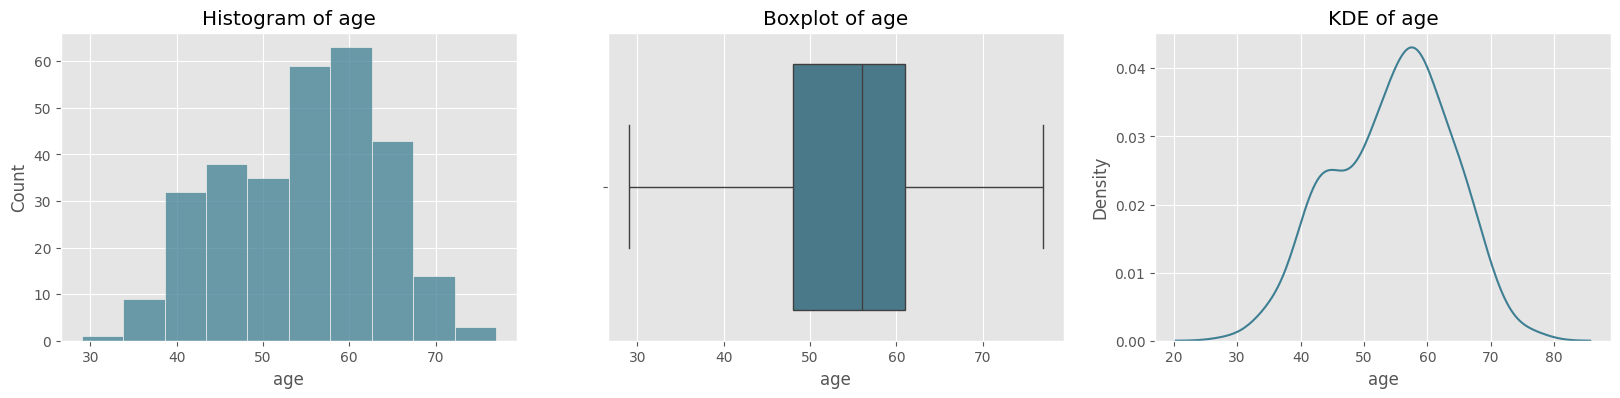

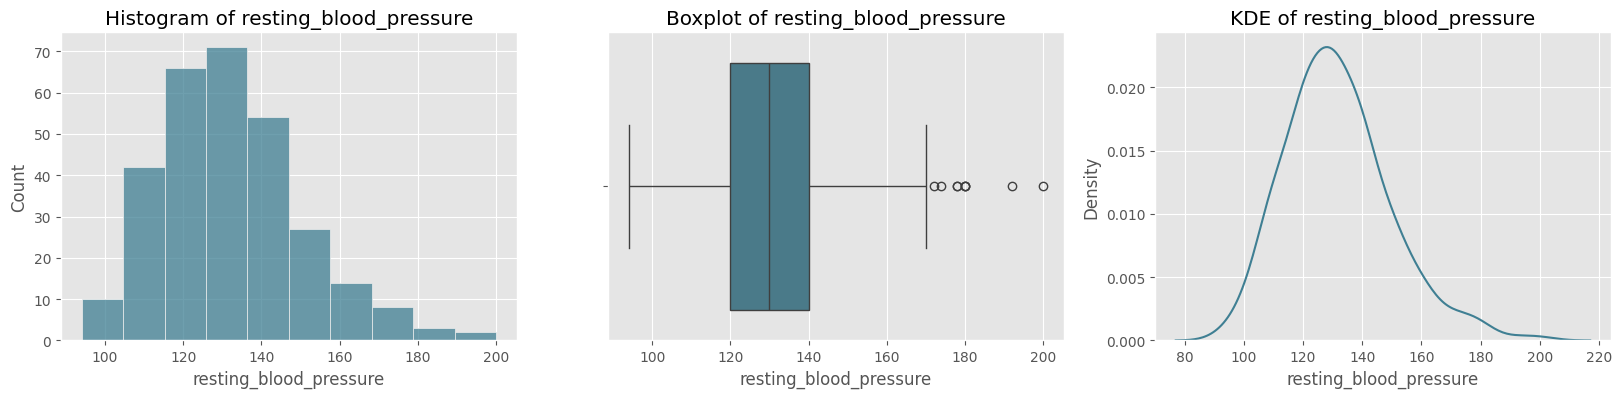

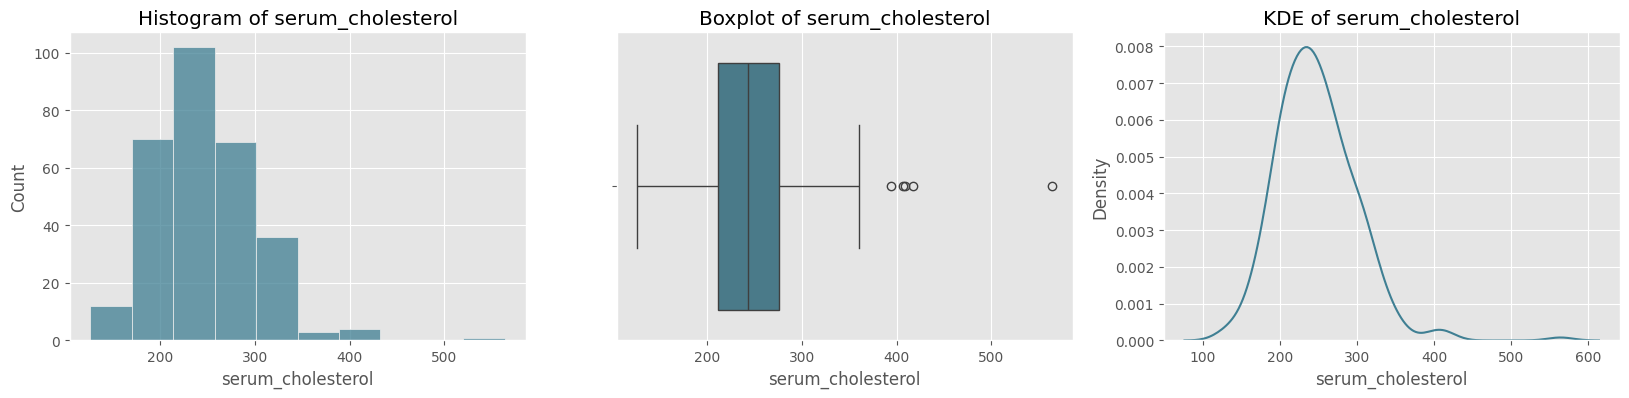

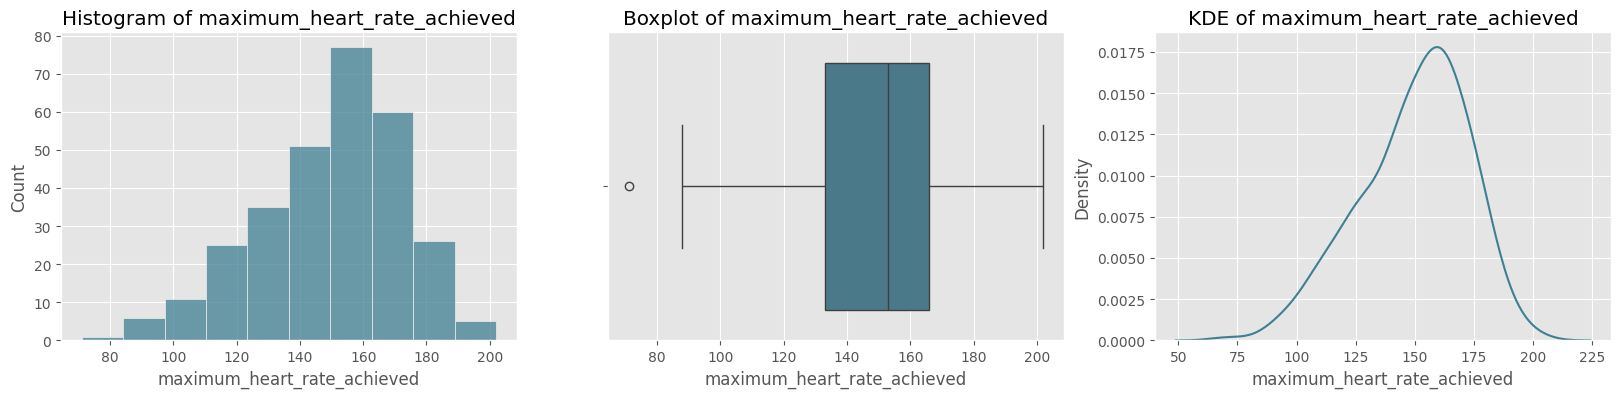

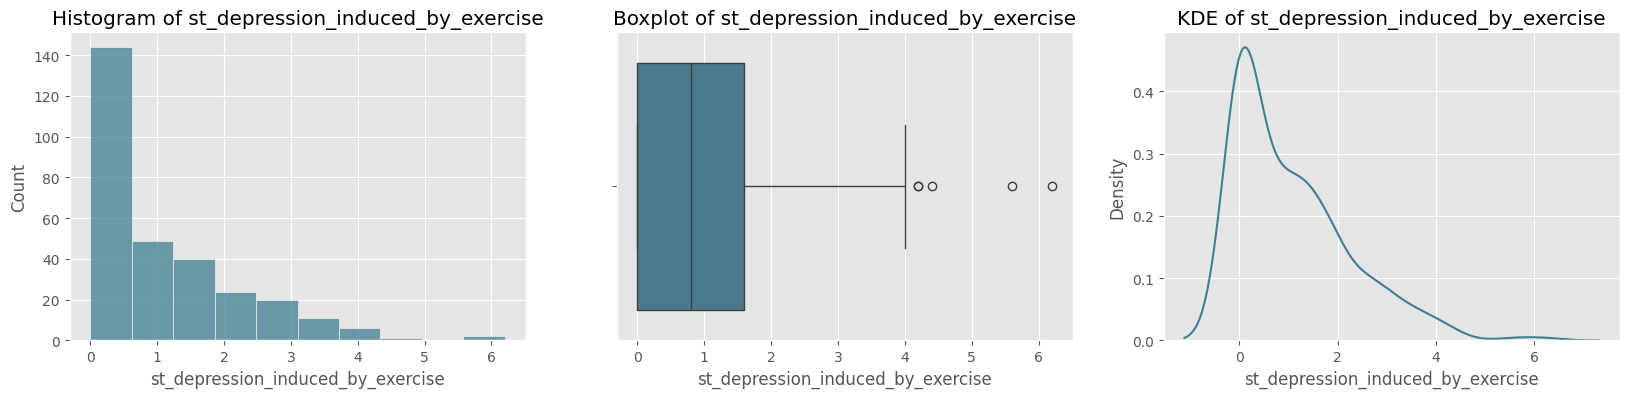

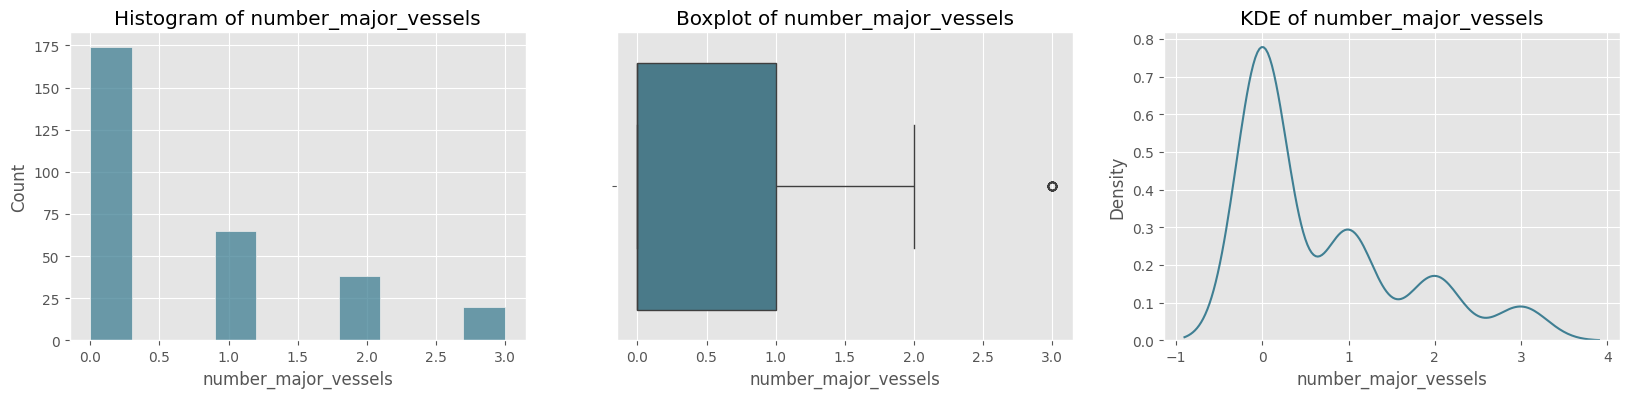

In [221]:
plot_features(df[numeric_features])

**When examining the distributions, it was observed that the 'age' and 'resting blood pressure' features are approximately normally distributed, 'serum cholesterol' is slightly right-skewed, 'maximum heart rate achieved' is slightly left-skewed, and 'st_depression induced by exercise' is highly right-skewed.**

**This situation is also observed when reviewing the summary statistics, specifically the mean and median values of the variables.**

**Age**

**The values in the 'Age' variable appear to be normal, and no outliers have been found.**

In [222]:
describe_feature(df, "age")

Data type: int64


,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0


In [223]:
low_limit, up_limit = outlier_thresholds(df, "age")
show_outliers(df,"age", low_limit, up_limit)

low_limit: 28.5, up_limit: 80.5
There are 0 outliers in the dataset.


,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_ecg_results,maximum_heart_rate_achieved,exercise_induced_angina,st_depression_induced_by_exercise,slope_peak_exercise_st_segment,number_major_vessels,thal,presence_of_heart_disease


In [224]:
df = replace_with_thresholds(df, "age")

low_limit: 28.5, up_limit: 80.5
0 values replaced with the upper limit, 0 values replaced with the lower limit.


**Resting blood pressure**

- **9 outliers have been detected above the upper limit and have been capped at the upper limit value.**

In [225]:
describe_feature(df,"resting_blood_pressure")

Data type: int64


,count,mean,std,min,25%,50%,75%,max
resting_blood_pressure,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0


In [226]:
low_limit, up_limit = outlier_thresholds(df, "resting_blood_pressure")
show_outliers(df,"resting_blood_pressure", low_limit, up_limit)

low_limit: 90.0, up_limit: 170.0
There are 9 outliers in the dataset.


,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_ecg_results,maximum_heart_rate_achieved,exercise_induced_angina,st_depression_induced_by_exercise,slope_peak_exercise_st_segment,number_major_vessels,thal,presence_of_heart_disease
14,52.0,1,cp_non_anginal_pain,172,199,1,ecg_normal,162,0,0.5,slope_upsloping,0.0,thal_reversable_defect,0
83,68.0,1,cp_non_anginal_pain,180,274,1,ecg_left_ventricular_hypertrophy,150,1,1.6,slope_flat,0.0,thal_reversable_defect,1
126,56.0,0,cp_asymptomatic,200,288,1,ecg_left_ventricular_hypertrophy,133,1,4.0,slope_downsloping,2.0,thal_reversable_defect,1
172,59.0,0,cp_asymptomatic,174,249,0,ecg_normal,143,1,0.0,slope_flat,0.0,thal_normal,0
183,59.0,1,cp_typical_angina,178,270,0,ecg_left_ventricular_hypertrophy,145,0,4.2,slope_downsloping,0.0,thal_reversable_defect,0


In [227]:
df = replace_with_thresholds(df, "resting_blood_pressure")

low_limit: 90.0, up_limit: 170.0
9 values replaced with the upper limit, 0 values replaced with the lower limit.


**serum_cholesterol**

- 5 outliers have been detected above the upper limit and have been capped at the upper limit value.

In [228]:
describe_feature(df,"serum_cholesterol")

Data type: int64


,count,mean,std,min,25%,50%,75%,max
serum_cholesterol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0


In [229]:
low_limit, up_limit = outlier_thresholds(df, "serum_cholesterol")
show_outliers(df,"serum_cholesterol", low_limit, up_limit)

low_limit: 113.5, up_limit: 373.5
There are 5 outliers in the dataset.


,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_ecg_results,maximum_heart_rate_achieved,exercise_induced_angina,st_depression_induced_by_exercise,slope_peak_exercise_st_segment,number_major_vessels,thal,presence_of_heart_disease
48,65.0,0,cp_non_anginal_pain,140,417,1,ecg_left_ventricular_hypertrophy,157,0,0.8,slope_upsloping,1.0,thal_normal,0
121,63.0,0,cp_asymptomatic,150,407,0,ecg_left_ventricular_hypertrophy,154,0,4.0,slope_flat,3.0,thal_reversable_defect,1
152,67.0,0,cp_non_anginal_pain,115,564,0,ecg_left_ventricular_hypertrophy,160,0,1.6,slope_flat,0.0,thal_reversable_defect,0
173,62.0,0,cp_asymptomatic,140,394,0,ecg_left_ventricular_hypertrophy,157,0,1.2,slope_flat,0.0,thal_normal,0
181,56.0,0,cp_asymptomatic,134,409,0,ecg_left_ventricular_hypertrophy,150,1,1.9,slope_flat,2.0,thal_reversable_defect,1


In [230]:
df = replace_with_thresholds(df, "serum_cholesterol")

low_limit: 113.5, up_limit: 373.5
5 values replaced with the upper limit, 0 values replaced with the lower limit.


**maximum_heart_rate_achieved**

- Alt limit değerinin altında 1 adet aykırı değer tespit edilmiş ve alt limit değerine baskılanmıştır.

In [231]:
describe_feature(df,"maximum_heart_rate_achieved")

Data type: int64


,count,mean,std,min,25%,50%,75%,max
maximum_heart_rate_achieved,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0


In [232]:
low_limit, up_limit = outlier_thresholds(df, "maximum_heart_rate_achieved")
show_outliers(df,"maximum_heart_rate_achieved", low_limit, up_limit)

low_limit: 83.5, up_limit: 215.5
There are 1 outliers in the dataset.


,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_ecg_results,maximum_heart_rate_achieved,exercise_induced_angina,st_depression_induced_by_exercise,slope_peak_exercise_st_segment,number_major_vessels,thal,presence_of_heart_disease
245,67.0,1,cp_asymptomatic,120,237.0,0,ecg_normal,71,0,1.0,slope_flat,0.0,thal_normal,1


In [233]:
df = replace_with_thresholds(df, "maximum_heart_rate_achieved")

low_limit: 83.5, up_limit: 215.5
0 values replaced with the upper limit, 1 values replaced with the lower limit.


**st_depression_induced_by_exercise**

- Üst limit değerinin üzerinde 5 adet aykırı değer tespit edilmiş ve üst limit değerine baskılanmıştır.

In [234]:
describe_feature(df,"st_depression_induced_by_exercise")

Data type: float64


,count,mean,std,min,25%,50%,75%,max
st_depression_induced_by_exercise,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


In [235]:
low_limit, up_limit = outlier_thresholds(df, "st_depression_induced_by_exercise")
show_outliers(df,"st_depression_induced_by_exercise", low_limit, up_limit)

low_limit: -2.4000000000000004, up_limit: 4.0
There are 5 outliers in the dataset.


,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_ecg_results,maximum_heart_rate_achieved,exercise_induced_angina,st_depression_induced_by_exercise,slope_peak_exercise_st_segment,number_major_vessels,thal,presence_of_heart_disease
91,62.0,0,cp_asymptomatic,160,164.0,0,ecg_left_ventricular_hypertrophy,145.0,0,6.2,slope_downsloping,3.0,thal_reversable_defect,1
123,55.0,1,cp_asymptomatic,140,217.0,0,ecg_normal,111.0,1,5.6,slope_downsloping,0.0,thal_reversable_defect,1
183,59.0,1,cp_typical_angina,170,270.0,0,ecg_left_ventricular_hypertrophy,145.0,0,4.2,slope_downsloping,0.0,thal_reversable_defect,0
191,51.0,1,cp_asymptomatic,140,298.0,0,ecg_normal,122.0,1,4.2,slope_flat,3.0,thal_reversable_defect,1
285,58.0,1,cp_asymptomatic,114,318.0,0,ecg_st_t_wave_abnormality,140.0,0,4.4,slope_downsloping,3.0,thal_fixed_defect,1


In [236]:
df = replace_with_thresholds(df, "st_depression_induced_by_exercise")

low_limit: -2.4000000000000004, up_limit: 4.0
5 values replaced with the upper limit, 0 values replaced with the lower limit.


**number_major_vessels**

- 0 ile 3 arasında değer alan floroskopi ile tespit edilmiş damar sayısını ifade eden kesikli sayısal değişkendir. Damar sayısının 0 ile 3 arası değer aldığı doğrulanmıştır.

In [237]:
describe_categorical_feature(df, "number_major_vessels")

Data type: float64


,number_major_vessels,count
0,0.0,174
1,1.0,65
2,2.0,38
3,3.0,20


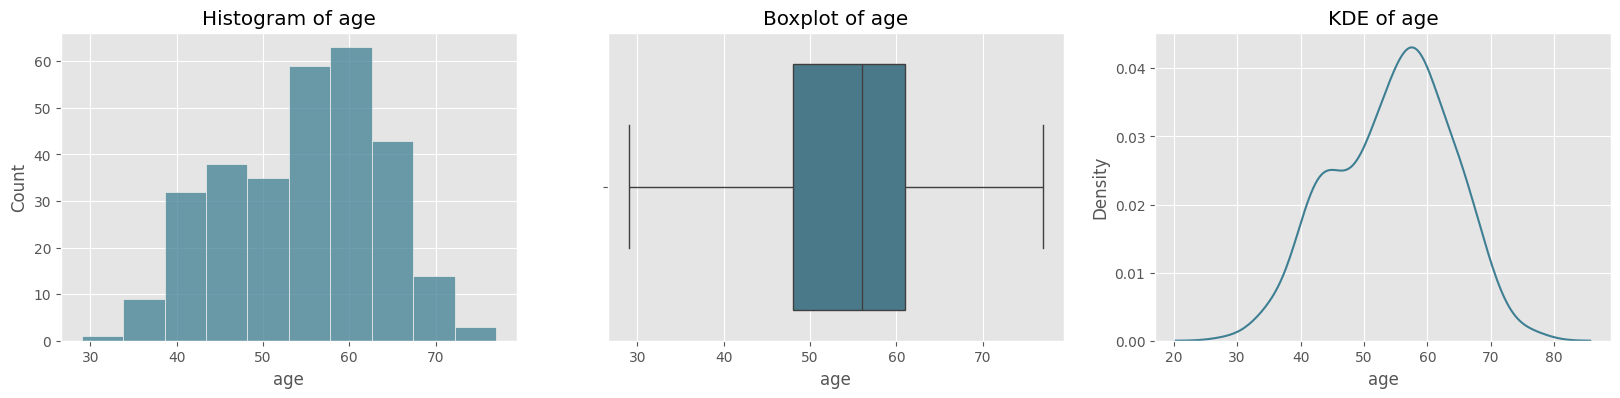

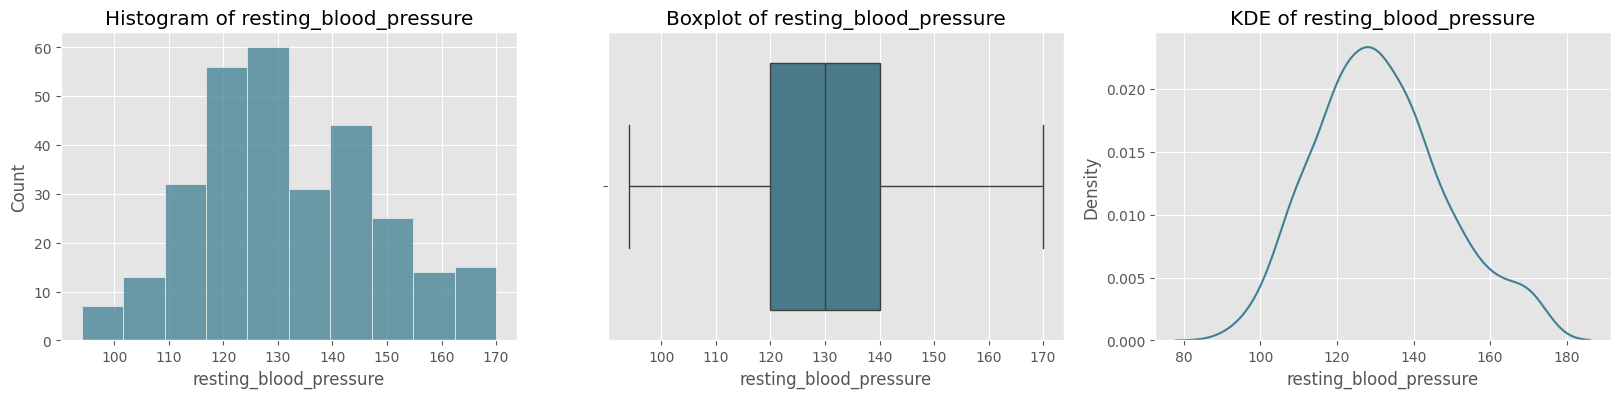

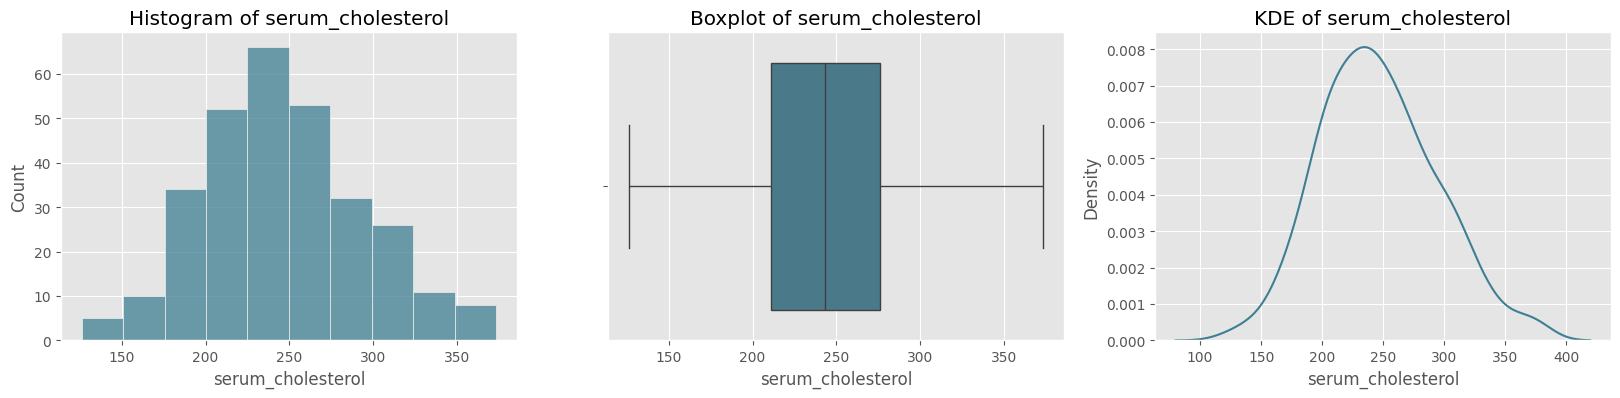

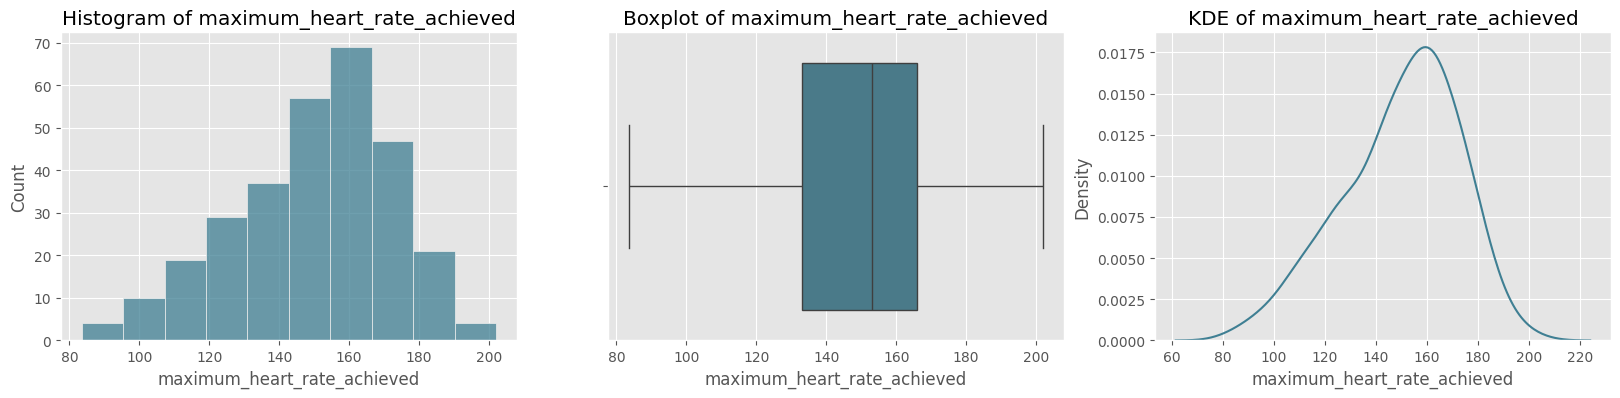

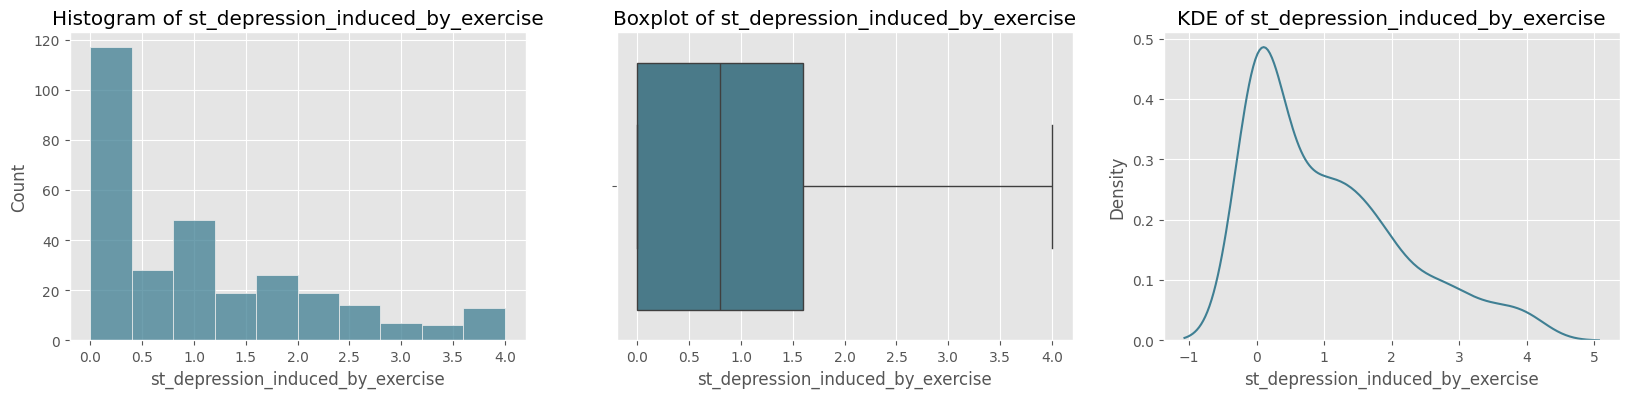

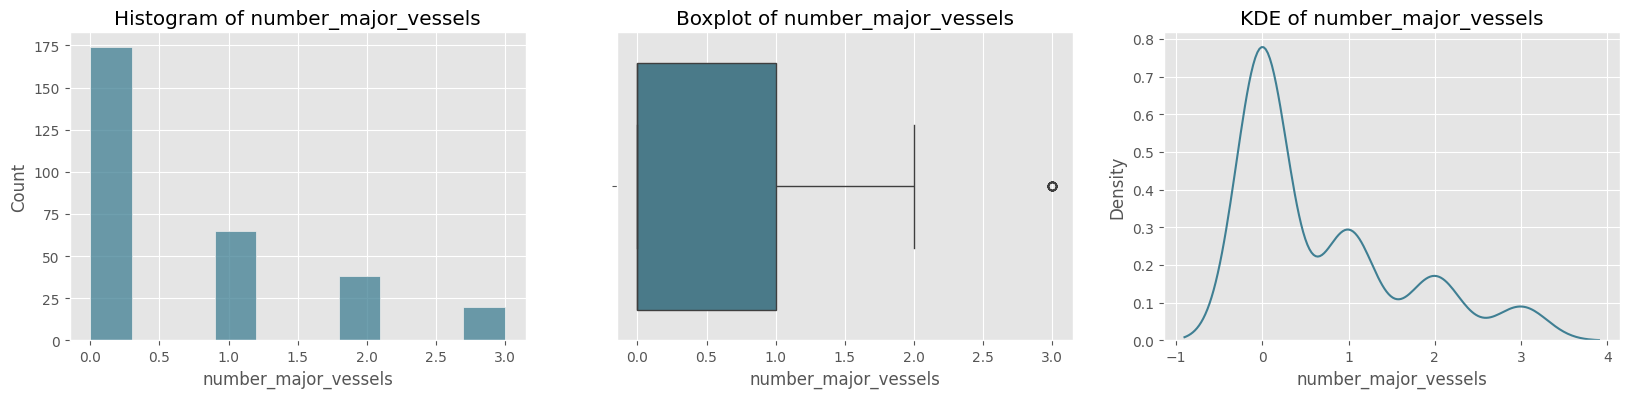

In [238]:
plot_features(df[numeric_features])

- **As a result of outlier treatment, slight improvements have been observed in the distributions. Specifically, the 'serum cholesterol' feature has become more normal.**
- **In this dataset, where the data is skewed both to the right and left, scaling will be applied during the modeling phase to improve model performance.**

**Validation of Numerical and Categorical Variables**
- There are no different or unexpected values in the categories. Validation has been performed.

In [239]:
numeric_categorical_features = [
    "sex",
    "chest_pain_type",
    "fasting_blood_sugar",
    "resting_ecg_results",
    "exercise_induced_angina",
    "thal",
    "slope_peak_exercise_st_segment",
    "presence_of_heart_disease"
]

In [240]:
for feature in numeric_categorical_features:
    print(df[[feature]].value_counts())

sex
1      201
0       96
Name: count, dtype: int64
chest_pain_type    
cp_asymptomatic        142
cp_non_anginal_pain     83
cp_atypical_angina      49
cp_typical_angina       23
Name: count, dtype: int64
fasting_blood_sugar
0                      254
1                       43
Name: count, dtype: int64
resting_ecg_results             
ecg_normal                          147
ecg_left_ventricular_hypertrophy    146
ecg_st_t_wave_abnormality             4
Name: count, dtype: int64
exercise_induced_angina
0                          200
1                           97
Name: count, dtype: int64
thal                  
thal_normal               164
thal_reversable_defect    115
thal_fixed_defect          18
Name: count, dtype: int64
slope_peak_exercise_st_segment
slope_upsloping                   139
slope_flat                        137
slope_downsloping                  21
Name: count, dtype: int64
presence_of_heart_disease
0                            214
1                             83
N

# Feature Engineering

**Encoding of Categorical Variables**

- The categorical variables were examined one by one, and appropriate encoding methods were applied.

**Sex**

- The values for male and female are encoded as 0 and 1 in the dataset. No further processing has been applied.

In [241]:
describe_categorical_feature(df, "sex")

Data type: int64


,sex,count
0,1,201
1,0,96


**Chest pain type**

- Refers to the types of chest pain. As seen in the descriptions, there is no hierarchy of size or magnitude among the chest pain types. These are nominal categorical variables. Therefore, applying one-hot encoding would be more appropriate.

- **1: Typical angina**: 
    - Chest pain that typically occurs during physical activity or stress, and subsides with rest or nitroglycerin.
    - It is considered related to the heart.
- **2: Atypical angina**: 
    - Similar to typical angina, but with different symptoms and triggers.
    - It may or may not be related to the heart.
- **3: Non-anginal pain**: 
    - Chest pain, but not typical of angina and usually not related to the heart.
    - It could be caused by muscles or the skeletal system, for example.
- **4: Asymptomatic**: 
    - Conditions such as heart disease without chest pain.


In [242]:
describe_categorical_feature(df, "chest_pain_type")

Data type: object


,chest_pain_type,count
0,cp_asymptomatic,142
1,cp_non_anginal_pain,83
2,cp_atypical_angina,49
3,cp_typical_angina,23


In [243]:
category_one_hot = pd.get_dummies(df["chest_pain_type"]).astype(int)
df.drop("chest_pain_type", axis=1,inplace=True)
df=pd.concat([df,category_one_hot], axis=1)

**fasting_blood_sugar**

- The fasting blood sugar value is coded as 1 if it is greater than 120 mg/dl, otherwise it is coded as 0. No additional processing is required.

In [244]:
describe_categorical_feature(df, "fasting_blood_sugar")

Data type: int64


,fasting_blood_sugar,count
0,0,254
1,1,43


**resting_ecg_results**

- Represents the resting ECG results. As seen from the descriptions, there is no hierarchical relationship between them. These are nominal categorical variables. Therefore, applying one-hot encoding is more appropriate.

**0: Normal**:
- A normal ST-T wave pattern with no abnormalities on the heart's electrocardiogram (EKG).

**1: ST-T Wave Abnormality**:
- Abnormalities are present in the ST-T wave; this may include T-wave inversion and/or an elevation or depression of the ST segment greater than 0.05 mV.

**2: Possible or Definite Left Ventricular Hypertrophy**:
- An EKG finding showing left ventricular hypertrophy according to the Estes criteria.

In [245]:
describe_categorical_feature(df, "resting_ecg_results")

Data type: object


,resting_ecg_results,count
0,ecg_normal,147
1,ecg_left_ventricular_hypertrophy,146
2,ecg_st_t_wave_abnormality,4


In [246]:
category_one_hot = pd.get_dummies(df["resting_ecg_results"]).astype(int)
df.drop("resting_ecg_results", axis=1,inplace=True)
df=pd.concat([df,category_one_hot], axis=1)

**exercise_induced_angina**

- Angina (chest pain) induced by exercise. This refers to chest pain occurring during physical activity. Since it is encoded as 1 if pain occurs after exercise and 0 if not, no further processing is required.

In [247]:
describe_categorical_feature(df, "exercise_induced_angina")

Data type: int64


,exercise_induced_angina,count
0,0,200
1,1,97


**thal**

**thal:** Refers to the results of the Thallium stress test. This test is used to assess blood flow and oxygenation in the heart muscle. The test is performed to examine the adequacy of blood flow in certain areas of the heart muscle. There is no inherent order or ranking between these values. They are nominal categorical variables. Therefore, one-hot encoding is the most appropriate method to apply.

**Thallium Stress Test Results:**

**3: Normal**:
- This indicates no abnormalities in blood flow to the heart muscle.

**6: Fixed Defect**:
- A permanent defect or damage in the heart muscle that does not improve with exercise or medication. This represents a permanent disorder in specific areas of the heart.

**7: Reversible Defect**:
- A temporary defect or damage in the heart muscle that can improve with exercise or medication. This indicates a condition that can improve with treatment or exercise.

In [248]:
describe_categorical_feature(df, "thal")

Data type: object


,thal,count
0,thal_normal,164
1,thal_reversable_defect,115
2,thal_fixed_defect,18


In [249]:
category_one_hot = pd.get_dummies(df["thal"]).astype(int)
df.drop("thal", axis=1,inplace=True)
df=pd.concat([df,category_one_hot], axis=1)

**slope_peak_exercise_st_segment**

Measures the changes in the ST segment slope on the EKG during exercise. It helps evaluate how the ST segment responds to physical activity. One-hot encoding is also suitable for encoding this feature.

**1: Upsloping**:
- The ST segment slopes upward during exercise. Typically indicates good heart muscle blood flow and proper heart function.

**2: Flat**:
- The ST segment remains flat during exercise. This requires careful evaluation to determine whether there is adequate blood flow to the heart muscle.

**3: Downsloping**:
- The ST segment slopes downward during exercise. Often indicates a potential problem with the heart muscle or a sign of oxygen deficiency.

In [250]:
describe_categorical_feature(df, "slope_peak_exercise_st_segment")

Data type: object


,slope_peak_exercise_st_segment,count
0,slope_upsloping,139
1,slope_flat,137
2,slope_downsloping,21


In [251]:
category_one_hot = pd.get_dummies(df["slope_peak_exercise_st_segment"]).astype(int)
df.drop("slope_peak_exercise_st_segment", axis=1,inplace=True)
df=pd.concat([df,category_one_hot], axis=1)

**`presence_of_heart_disease` (Target Feature)**:

- **0**: No heart disease.
- **1**: Heart disease present.

In [252]:
describe_categorical_feature(df, "presence_of_heart_disease")

Data type: int64


,presence_of_heart_disease,count
0,0,214
1,1,83


**Encoding operations have been completed.**

In [253]:
df.head()

,age,sex,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,maximum_heart_rate_achieved,exercise_induced_angina,st_depression_induced_by_exercise,number_major_vessels,presence_of_heart_disease,cp_asymptomatic,cp_atypical_angina,cp_non_anginal_pain,cp_typical_angina,ecg_left_ventricular_hypertrophy,ecg_normal,ecg_st_t_wave_abnormality,thal_fixed_defect,thal_normal,thal_reversable_defect,slope_downsloping,slope_flat,slope_upsloping
0,63.0,1,145,233.0,1,150.0,0,2.3,0.0,0,0,0,0,1,1,0,0,1,0,0,1,0,0
1,67.0,1,160,286.0,0,108.0,1,1.5,3.0,1,1,0,0,0,1,0,0,0,1,0,0,1,0
2,67.0,1,120,229.0,0,129.0,1,2.6,2.0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
3,37.0,1,130,250.0,0,187.0,0,3.5,0.0,0,0,0,1,0,0,1,0,0,1,0,1,0,0
4,41.0,0,130,204.0,0,172.0,0,1.4,0.0,0,0,1,0,0,1,0,0,0,1,0,0,0,1


**Feature Extraction**

- The variables here were extracted after all preprocessing and encoding were done, and a baseline model was created. To facilitate the process management, the model performance was evaluated after each feature extraction and logged in mlflow. Additionally, commits were made for each variable using the git version control system.
  
- Feature extraction is done to improve the model's performance. The models created in the project have achieved very high scores with the existing features. The data size is very small. Normally, when a new feature is added, increasing the amount of data is a commonly used practice. However, since high scores were achieved with the existing data in this project, adding each feature may lead to overfitting, which is a problem of excessive learning.


**Creation of Categorical Age Variable**

- The relationship between the age variable and the target variable may not always be linear. For example, in our project, the health status of individuals in a certain age group can differ from younger to older individuals.
- Categorical age groups can help the model learn patterns within specific age ranges better. This can improve the model’s accuracy and generalization ability.
- Age data tends to be concentrated within specific ranges, which can affect the model’s performance. Dividing it into categorical variables can reduce this concentration and make the data more balanced.
- For these reasons, a categorical age variable has been created.
- The age ranges were defined as 0-18, 18-40, 40-60, and above 60, and coded as ordinal categorical variables 0, 1, 2, and 3 respectively.
- The 0-18 age category does not exist in the dataset.

In [254]:
age_bins = [-np.inf, 18, 40, 60, np.inf]
age_labels = [0, 1, 2, 3]
df['age_category'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

In [255]:
describe_categorical_feature(df, "age_category")

Data type: category


,age_category,count
0,2,201
1,3,79
2,1,17
3,0,0


- The dataset has a high concentration of people in the 40-60 age group.

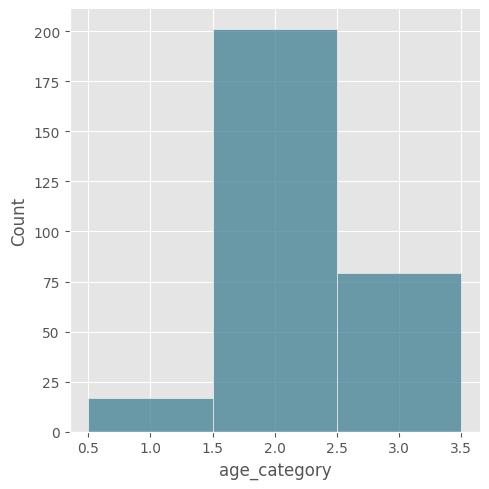

In [256]:
sns.displot(data=df, x='age_category')

- It is observed that the majority of heart disease patients are in the elderly group, aged 60 and above.

In [257]:
df.groupby("age_category")["presence_of_heart_disease"].mean().head().reset_index()

,age_category,presence_of_heart_disease
0,0,NaN
1,1,0.176471
2,2,0.248756
3,3,0.379747


**Comparison of the newly created categorical age feature with numerical features.**

- According to the available dataset:
  - resting_blood_pressure and serum_cholesterol values are close to each other and tend to increase as age progresses.
  - maximum_heart_rate_achieved is highest in the 18-40 age group.
  - st_depression_induced_by_exercise and number_major_vessels values are more concentrated in the 60+ age group.

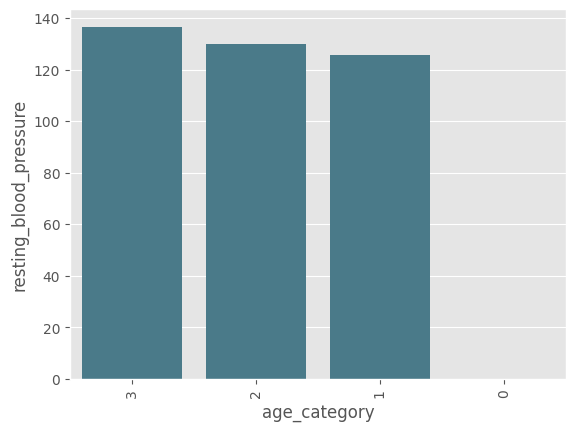

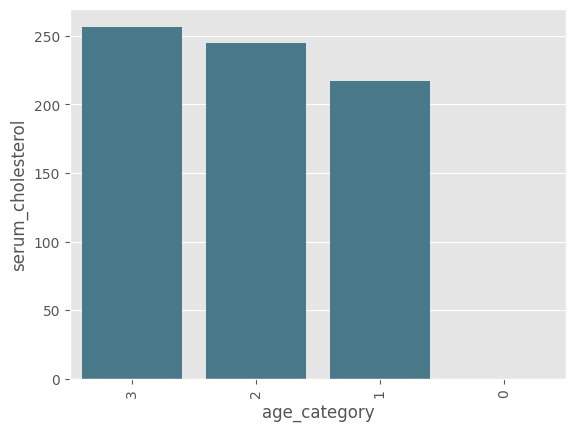

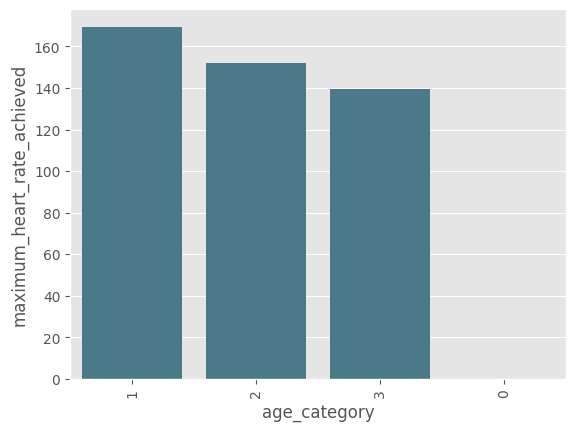

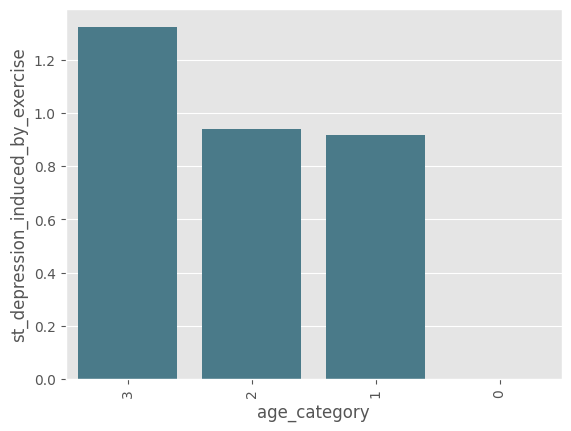

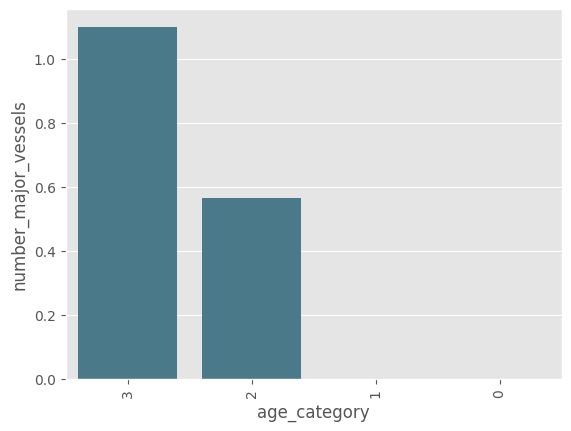

In [258]:
numerical_features = ["resting_blood_pressure", "serum_cholesterol", "maximum_heart_rate_achieved", "st_depression_induced_by_exercise", "number_major_vessels"]
for num_feat in numerical_features:
    custom_barplot(df, 'age_category',num_feat, agg_func=np.mean)

**Age category Ordinal Encoding**

In [259]:
encoder = OrdinalEncoder(categories=[[0, 1, 2, 3]])
df['age_category'] = encoder.fit_transform(df[['age_category']])
describe_categorical_feature(df, "age_category")

Data type: float64


,age_category,count
0,2.0,201
1,3.0,79
2,1.0,17


**Creation of categorical variable for maximum_heart_rate_achieved**

- Similarly, a categorical variable has been created based on heart rate values. Since resting_blood_pressure values are very close to each other, they have not been considered.


In [260]:
describe_feature(df, "maximum_heart_rate_achieved")

Data type: float64


,count,mean,std,min,25%,50%,75%,max
maximum_heart_rate_achieved,297.0,149.641414,22.807957,83.5,133.0,153.0,166.0,202.0


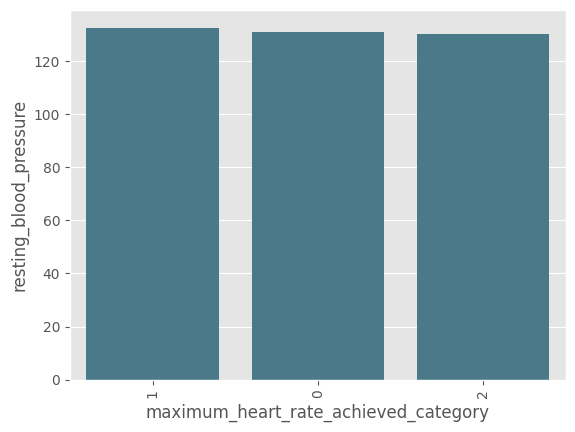

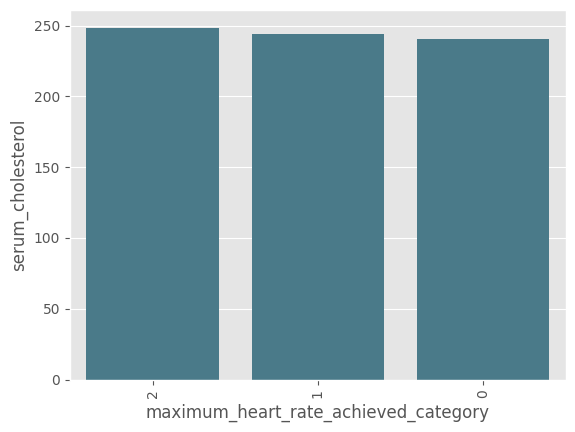

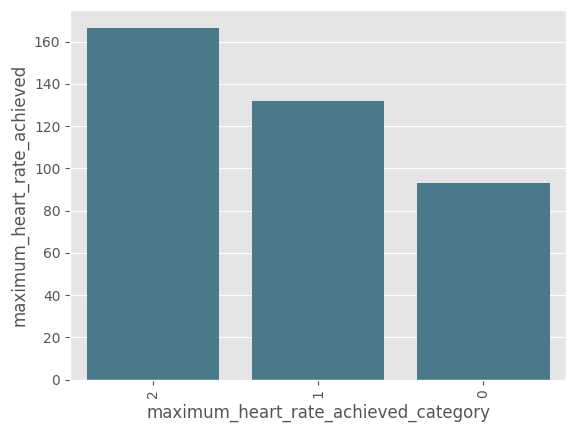

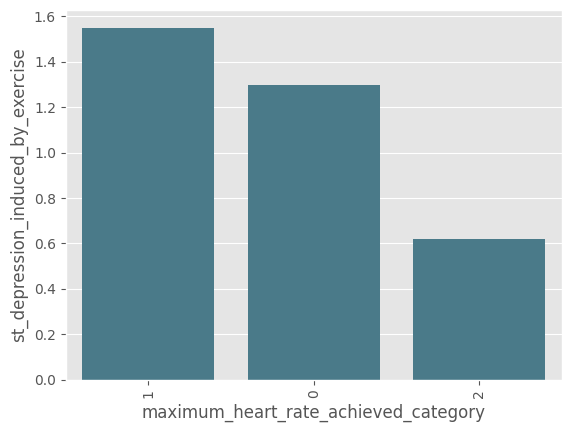

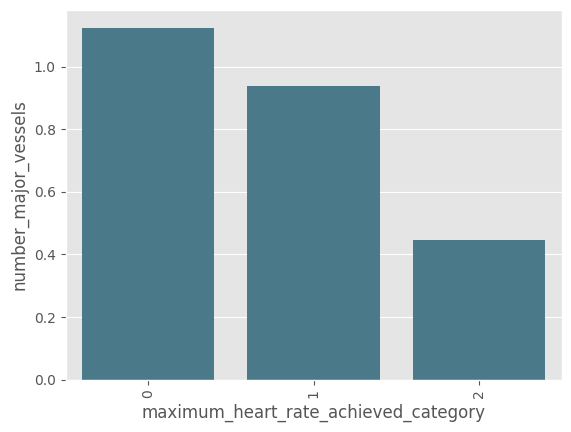

In [261]:
mhr_bins = [-np.inf, 100, 150, np.inf]
mhr_labels = [0, 1, 2]
df['maximum_heart_rate_achieved_category'] = pd.cut(df['maximum_heart_rate_achieved'], bins=mhr_bins, labels=mhr_labels)
numerical_features = ["resting_blood_pressure", "serum_cholesterol", "maximum_heart_rate_achieved", "st_depression_induced_by_exercise", "number_major_vessels"]
for num_feat in numerical_features:
    custom_barplot(df, 'maximum_heart_rate_achieved_category',num_feat, agg_func=np.mean)

**Maximum_heart_rate_achieved_category Ordinal Encoding**

In [262]:
encoder = OrdinalEncoder(categories=[[0, 1, 2]])
df['maximum_heart_rate_achieved_category'] = encoder.fit_transform(df[['maximum_heart_rate_achieved_category']])
describe_categorical_feature(df, "maximum_heart_rate_achieved_category")

Data type: float64


,maximum_heart_rate_achieved_category,count
0,2.0,161
1,1.0,128
2,0.0,8


**Creation of categorical variable for serum_cholesterol**

- Similarly, a categorical variable has been created based on serum_cholesterol values.

In [263]:
describe_feature(df, "serum_cholesterol")

Data type: float64


,count,mean,std,min,25%,50%,75%,max
serum_cholesterol,297.0,246.260943,47.836752,126.0,211.0,243.0,276.0,373.5


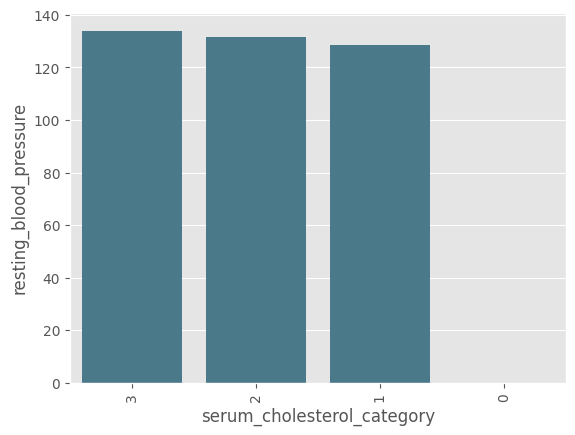

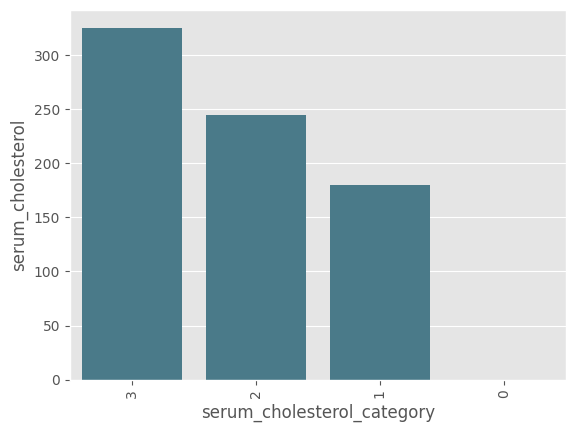

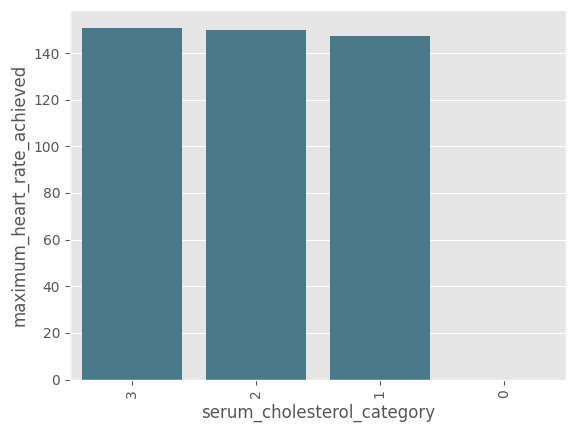

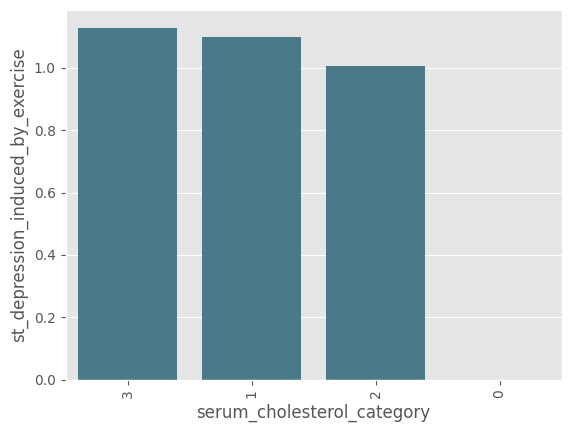

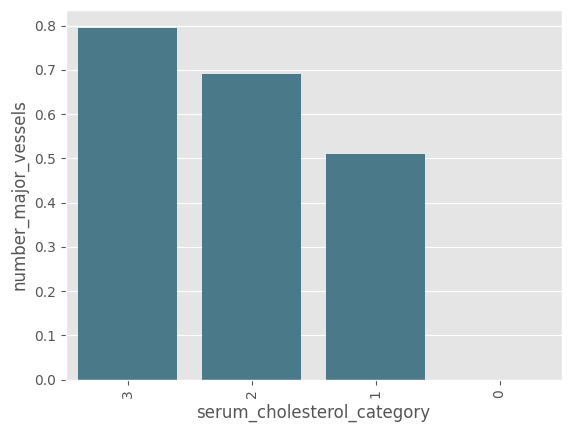

In [264]:
mhr_bins = [-np.inf, 100, 200, 300, np.inf]
mhr_labels = [0, 1, 2, 3]
df['serum_cholesterol_category'] = pd.cut(df['serum_cholesterol'], bins=mhr_bins, labels=mhr_labels)
numerical_features = ["resting_blood_pressure", "serum_cholesterol", "maximum_heart_rate_achieved", "st_depression_induced_by_exercise", "number_major_vessels"]
for num_feat in numerical_features:
    custom_barplot(df, 'serum_cholesterol_category',num_feat, agg_func=np.mean)

**Serum_cholesterol_category Ordinal Encoding**

In [265]:
encoder = OrdinalEncoder(categories=[[0, 1, 2, 3]])
df['serum_cholesterol_category'] = encoder.fit_transform(df[['serum_cholesterol_category']])
describe_categorical_feature(df, "serum_cholesterol_category")

Data type: float64


,serum_cholesterol_category,count
0,2.0,204
1,1.0,49
2,3.0,44


**Other Added Numerical Features:**

**Blood Pressure and Cholesterol Ratio**

- This feature represents the ratio of a person's blood pressure to their cholesterol level. High blood pressure and high cholesterol can increase the risk of heart disease.

  $$
  \text{BP\_Cholesterol\_Ratio} = \frac{\text{resting\_blood\_pressure}}{\text{serum\_cholesterol}}
  $$


**Heart Rate and Exercise Relationship**
- This feature measures the relationship between the maximum heart rate and exercise-induced angina. It can be used to assess the risk of heart disease.

  $$
  \text{HeartRate\_Angina\_Ratio} = \frac{\text{maximum\_heart\_rate\_achieved}}{1 + \text{exercise\_induced\_angina}}
  $$

  Here, the presence of exercise-induced angina (0 or 1) is added, and +1 is included in the denominator to avoid division by zero.


**Exercise-Induced ST Depression and Angina Relationship**

- ST depression during exercise can indicate heart disease. This feature represents the relationship between ST depression and angina.

  $$
  \text{ST\_Angina\_Ratio} = \frac{\text{st\_depression\_induced\_by\_exercise}}{1 + \text{exercise\_induced\_angina}}
  $$




**Total Number of Vessels and Heart Rate Relationship**

- This feature represents the relationship between maximum heart rate and the number of vessels detected by fluoroscopy. As the number of detected vessels increases, the risk of heart disease increases.

  $$
  \text{HeartRate\_Vessels\_Ratio} = \frac{\text{maximum\_heart\_rate\_achieved}}{1 + \text{number\_major\_vessels}}
  $$




Elde edilen yeni özelliklerin veri setine eklenmesi:

In [266]:
df['bp_cholesterol_ratio'] = df['resting_blood_pressure'] / df['serum_cholesterol']
df['heartrate_angina_ratio'] = df['maximum_heart_rate_achieved'] / (1 + df['exercise_induced_angina'])
df['st_angina_ratio'] = df['st_depression_induced_by_exercise'] / (1 + df['exercise_induced_angina'])
df['heartrate_vessels_ratio'] = df['maximum_heart_rate_achieved'] / (1 + df['number_major_vessels'])
df.head()

,age,sex,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,maximum_heart_rate_achieved,exercise_induced_angina,st_depression_induced_by_exercise,number_major_vessels,presence_of_heart_disease,cp_asymptomatic,cp_atypical_angina,cp_non_anginal_pain,cp_typical_angina,ecg_left_ventricular_hypertrophy,ecg_normal,ecg_st_t_wave_abnormality,thal_fixed_defect,thal_normal,thal_reversable_defect,slope_downsloping,slope_flat,slope_upsloping,age_category,maximum_heart_rate_achieved_category,serum_cholesterol_category,bp_cholesterol_ratio,heartrate_angina_ratio,st_angina_ratio,heartrate_vessels_ratio
0,63.0,1,145,233.0,1,150.0,0,2.3,0.0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,3.0,1.0,2.0,0.622318,150.0,2.30,150.0
1,67.0,1,160,286.0,0,108.0,1,1.5,3.0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,3.0,1.0,2.0,0.559441,54.0,0.75,27.0
2,67.0,1,120,229.0,0,129.0,1,2.6,2.0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,3.0,1.0,2.0,0.524017,64.5,1.30,43.0
3,37.0,1,130,250.0,0,187.0,0,3.5,0.0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1.0,2.0,2.0,0.520000,187.0,3.50,187.0
4,41.0,0,130,204.0,0,172.0,0,1.4,0.0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,2.0,2.0,2.0,0.637255,172.0,1.40,172.0


# Feature Selection

- In this section, feature selection is performed, acting as a filter for the features extracted in the feature extraction section.

**Correlation Analysis**

- Our target variable is `presence_of_heart_disease`. The correlation between this variable and other numerical variables has been analyzed.

**Pairplot**

- Visualizing all features took too long and was unreadable, so only numerical variables were visualized.
- A strong negative correlation is observed between `age` and `maximum_heart_rate_achieved`.
- A potential strong relationship between `age` and `serum_cholesterol` is also observed.


<Figure size 2500x1500 with 0 Axes>

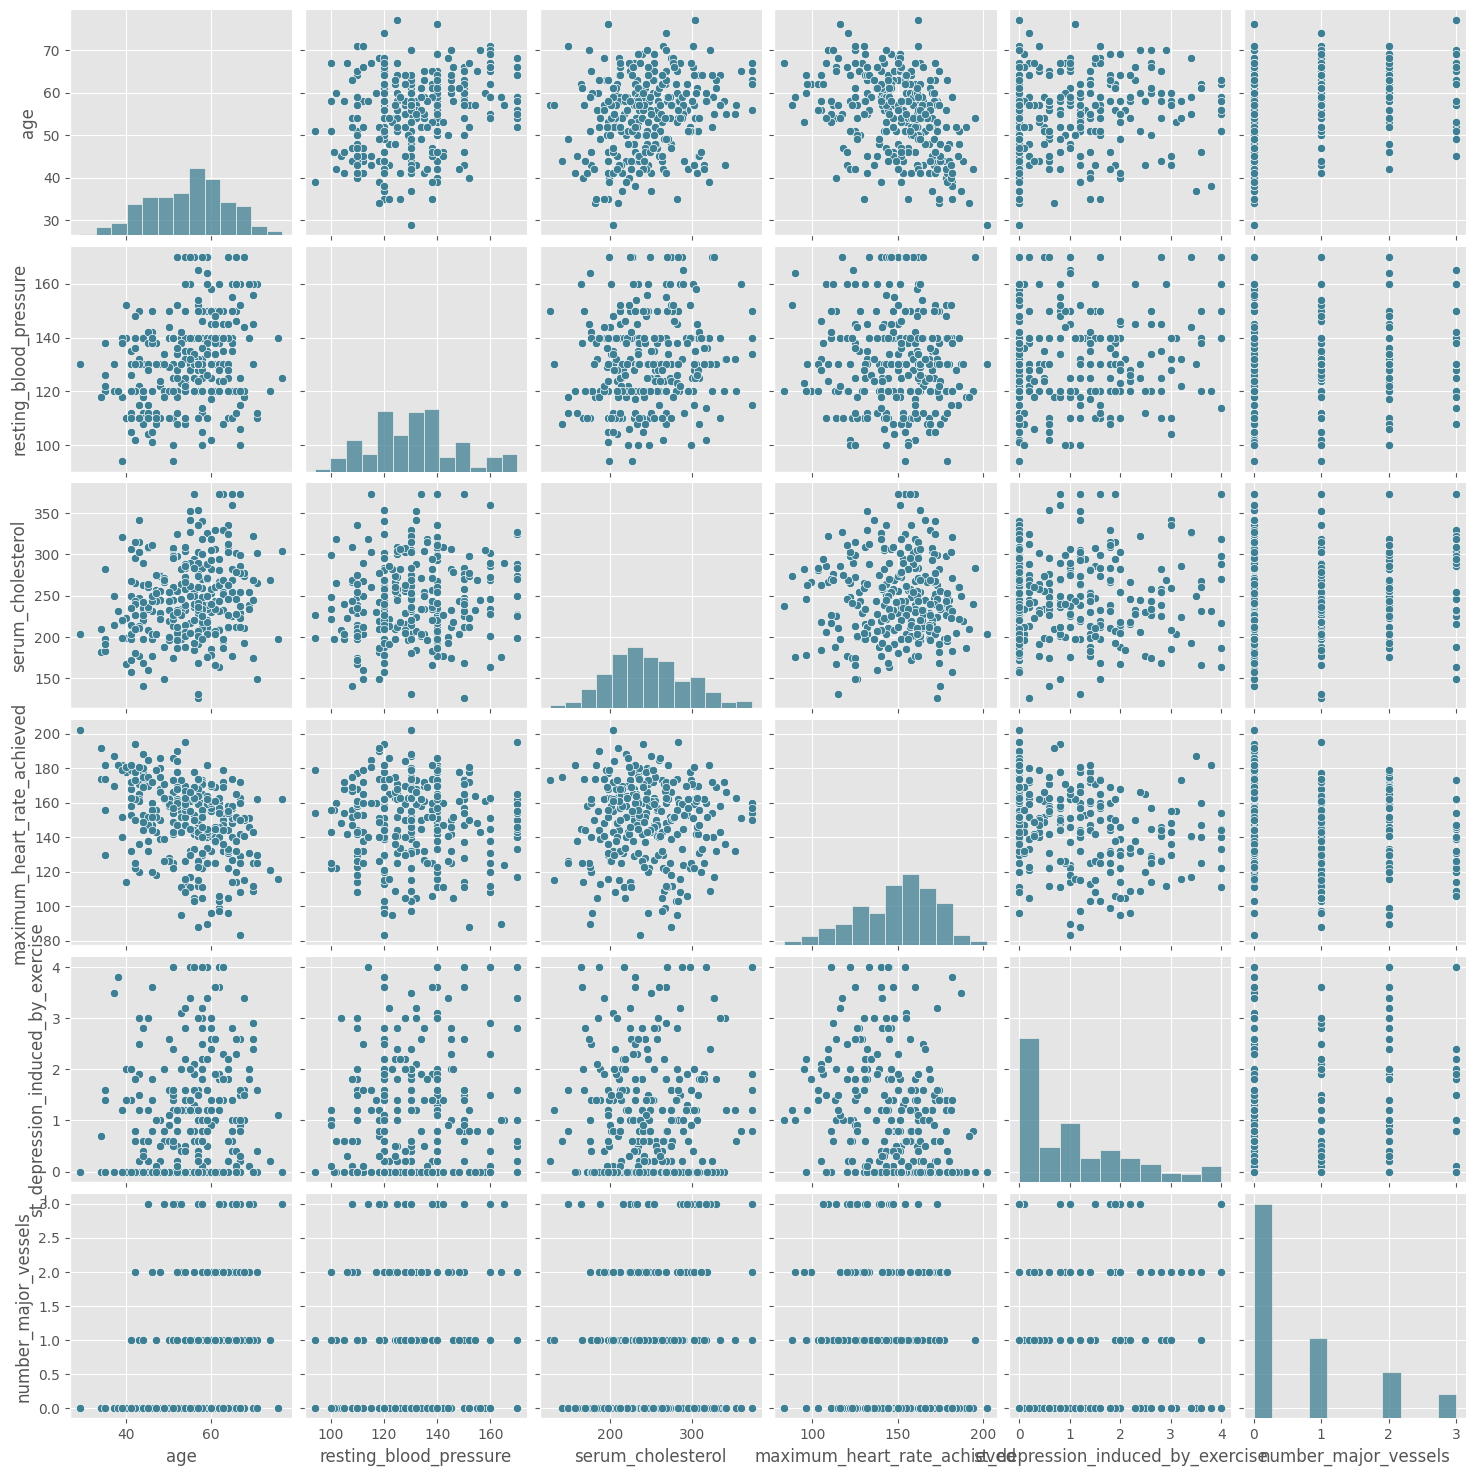

In [267]:
plt.figure(figsize=(25, 15))
sns.pairplot(data=df[numeric_features])
plt.show()

**Heatmap**

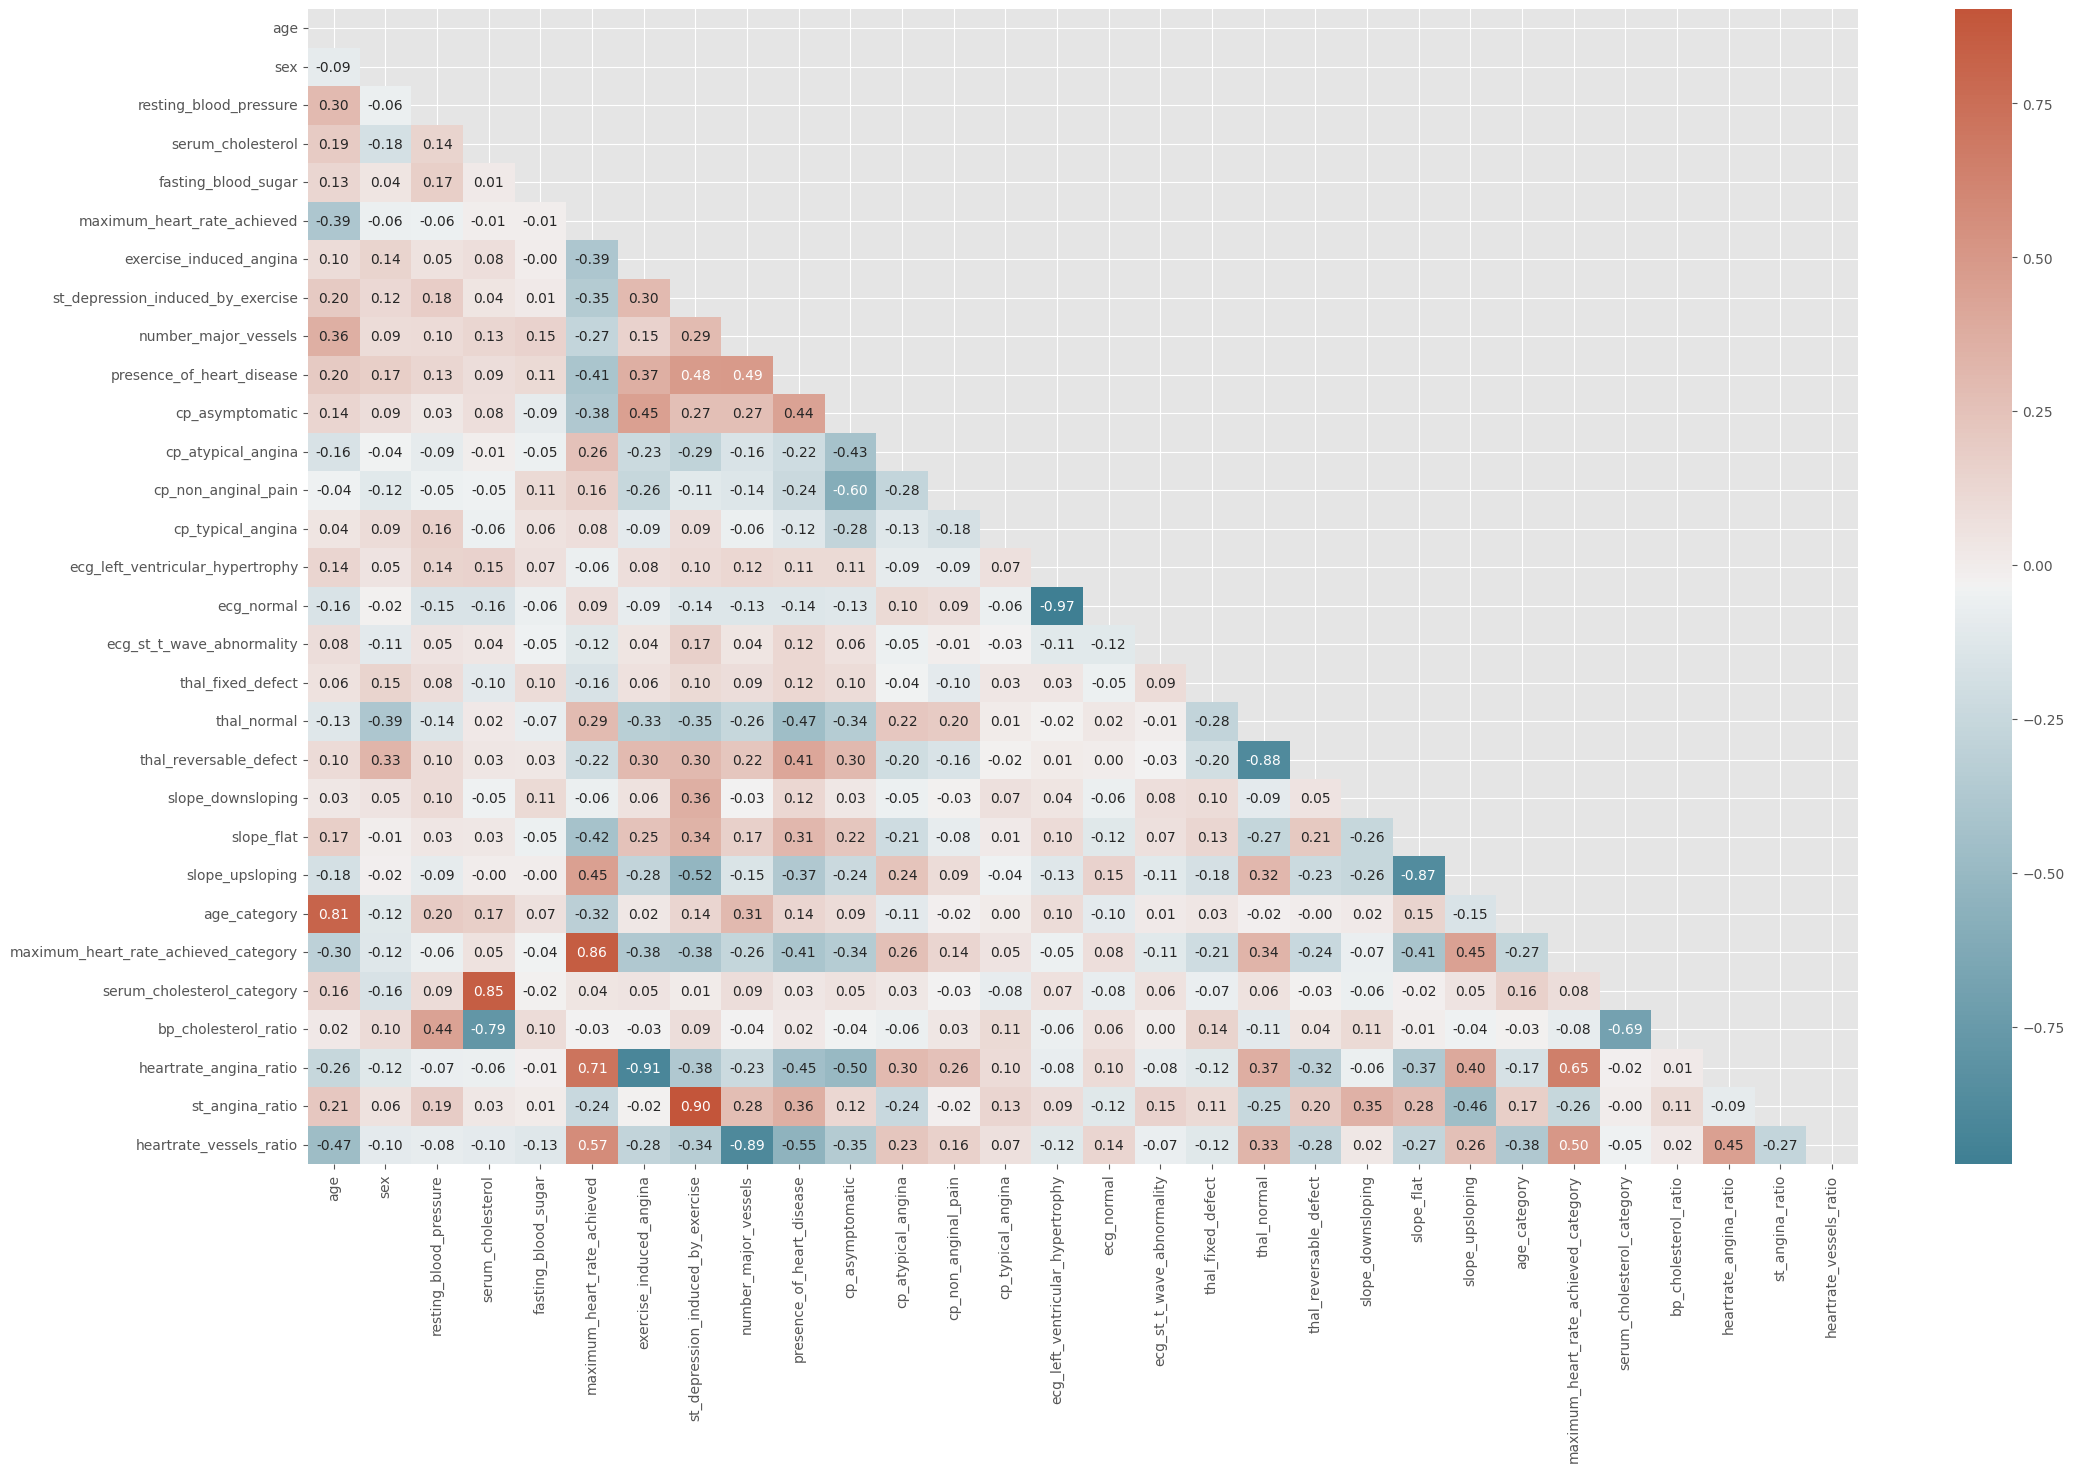

In [268]:
plt.figure(figsize=(25, 15))
num_variables = df.select_dtypes(include=["float64","int64","int32"])
corr_df = num_variables.corr()
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(tri_df,annot=True,fmt=".2f",cmap = cmap)
plt.show()

**Heatmap Review and Detection of Correlated Variables**

- Upon examining the heatmap, correlations are clearly visible through colors. Reds represent positive correlations, while blues indicate negative correlations.

- Variables with correlations greater than 0.70 can cause multicollinearity problems. Therefore, it is generally advisable to remove one of the correlated variables.
- Highly correlated variables convey the same information, and their small differences can mislead machine learning models. Removing these variables can improve model performance.
- Newly added features show high correlation, and to assess their impact, a threshold of 0.85 has been set.

Some of these variables include:
- `ecg_normal` and `ecg_left_ventricular_hypertrophy`: A very high negative correlation of -0.97.
- `thal_normal` and `thal_reversible_defect`: A very high negative correlation of -0.88.
- `slope_flat` and `slope_upsloping`: A very high negative correlation of -0.87.

**A function has been written for this process. The goal is to remove one of the highly correlated features above the threshold.**

In [269]:
def correlation_analysis(df: pd.DataFrame, threshold: float = 0.85) -> pd.DataFrame:
    """
    Analyzes and removes highly correlated features from the dataset.

    Parameters:
    df (pd.DataFrame): The input dataframe containing the features.
    threshold (float): The correlation threshold above which features will be removed. Default is 0.85.

    Returns:
    pd.DataFrame: The dataframe with highly correlated features removed.
    """
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    df.drop(columns=to_drop, axis=1, inplace=True)
    print(f"Features removed from the dataset: {to_drop}")
    return df


In [270]:
print(f"Number of features before removing correlated features: {len(df.columns)}")
df = correlation_analysis(df)
print(f"Number of features after removing correlated features: {len(df.columns)}")


Number of features before removing correlated features: 30
Features removed from the dataset: ['ecg_normal', 'thal_reversable_defect', 'slope_upsloping', 'maximum_heart_rate_achieved_category', 'heartrate_angina_ratio', 'st_angina_ratio', 'heartrate_vessels_ratio']
Number of features after removing correlated features: 23


**New Features Added After Correlation Analysis:**

- The features `age_category`, `serum_cholesterol_category`, and `bp_cholesterol_ratio` have been added to the dataset following the correlation analysis.


**Correlation Analysis Between Target Variable (presence_of_heart_disease) and Other Features**

- The correlation between the target variable `presence_of_heart_disease` and other numerical features has been analyzed. A threshold of 0.05 was set for the correlation, and the results were visualized.
- Initially, highly correlated features were removed, and the exact number of features correlated with the target variable was determined.
- A total of 18 features with a correlation higher than 0.05 with the target variable have been identified.


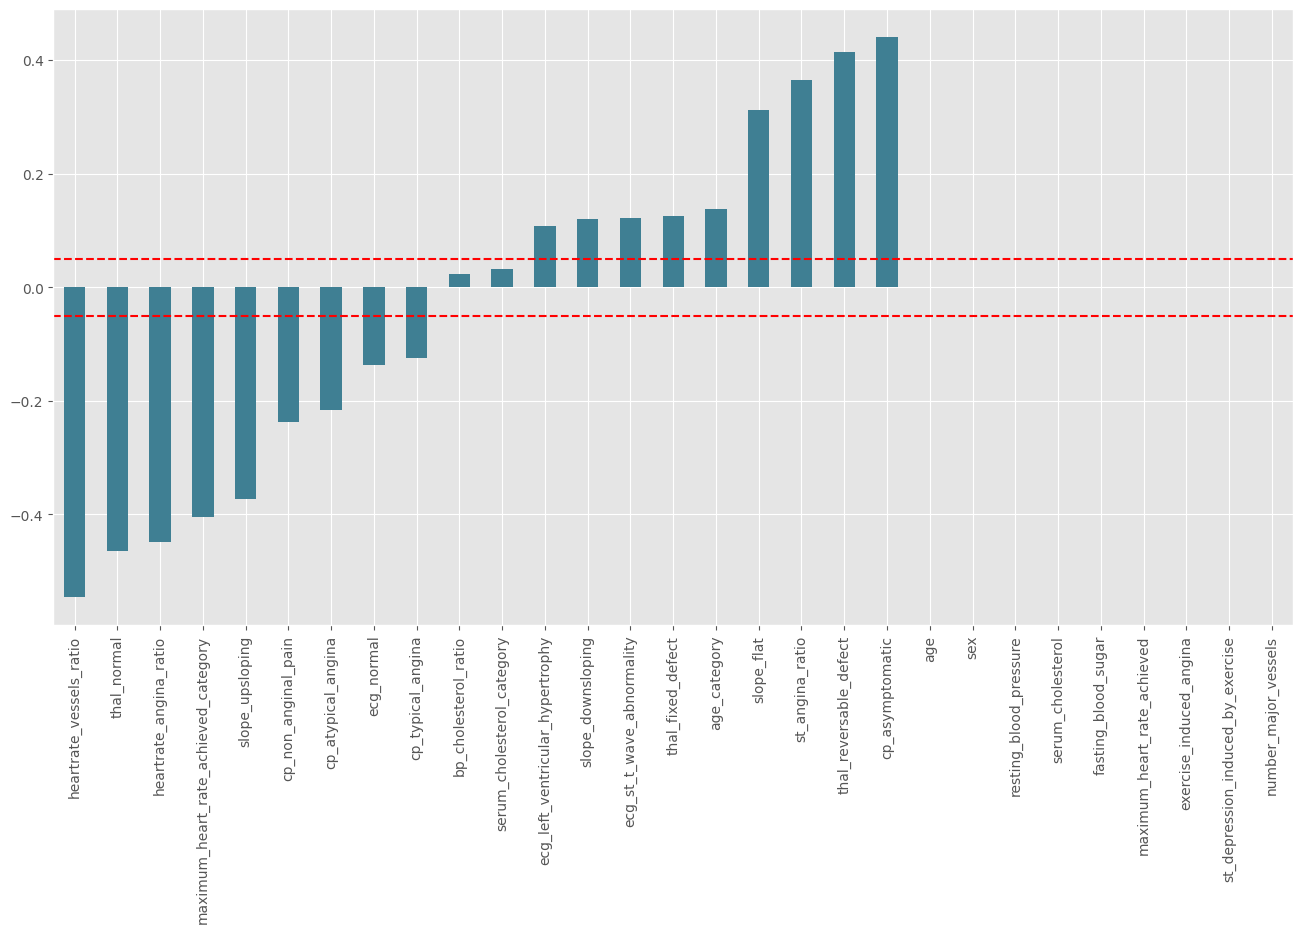

In [271]:
plt.figure(figsize=(16, 8))
tri_df["presence_of_heart_disease"].drop("presence_of_heart_disease").sort_values().plot(kind="bar")
plt.axhline(0.05, color ="red",linestyle ='--')
plt.axhline(-0.05, color='red',linestyle='--')
plt.show()

In [272]:
cor_target = abs(tri_df["presence_of_heart_disease"])
cor_target.drop("presence_of_heart_disease",inplace=True,axis=0)
correlated_features  = cor_target[cor_target >=0.05]
print("Total number of features:",len(df.select_dtypes(include=["float64","int64","int32"]).columns))
print("Number of correlated features:",len(correlated_features))

Total number of features: 23
Number of correlated features: 18


# Model Building and Evaluation

### In this section, the necessary scaling, normalization, and sampling processes will be applied at the relevant stages of the project.

**Selection of Models**

- The task of predicting whether a person has heart disease or not is a binary classification problem in machine learning.

- **Occam's Razor**: Following the principle of moving from simple to complex models, the **Logistic Regression** model was initially used. Since strong linear correlations exist in the dataset, this model might perform well. Logistic regression can also be thought of as a simple neural network with one neuron. The **binary cross-entropy** function is used as the loss function to update the coefficients.

- **Random Forest Classifier**: A tree-based model was preferred as a second model. Between tree-based models, **Random Forest Classifier** was chosen. The reason is that boosting algorithms (e.g., XGBoost) perform better on high-dimensional datasets, but since the dataset in this project is very small, the risk of **overfitting** increases. Therefore, **Random Forest Classifier** was chosen as the comparison model.

- Another reason for selecting a tree-based model is that it can address the class imbalance issue and perform well on imbalanced datasets. Additionally, **Random Forest Classifier** is based on the principle of **crowd wisdom**, where the final decision is made by many independent weak trees, rather than a single decision tree. Tree-based models are also resistant to scaling issues, meaning they can be used without requiring dataset scaling.

- Both models handle class imbalances through the **class_weights** parameter, giving more importance to the low-density classes.

  
---

**Selection of Evaluation Metrics**

Two key metrics were selected for the initial evaluation.

**Precision:**

- **Definition:** The ratio of true positive predictions to the total number of positive predictions (true positives + false positives).
- **Formula:**
  $$
  \text{Precision} = \frac{TP}{TP + FP}
  $$
- **Meaning:** It shows how many of the patients classified as positive (heart disease) by the model actually have heart disease.
- If false positives (healthy individuals misclassified as having heart disease) could lead to serious consequences, precision may be more important. For example, to avoid unnecessary treatment or concern for patients, reducing false positives becomes crucial.

**Recall:**

- **Definition:** The ratio of true positives (those with heart disease) to the total number of positive cases (true positives + false negatives).
- **Formula:**
  $$
  \text{Recall} = \frac{TP}{TP + FN}
  $$
- **Meaning:** It shows how many of the actual heart disease patients were correctly identified.
- If false negatives (heart disease patients misclassified as healthy) carry a greater risk, recall becomes more important. For example, failing to detect a heart disease patient could lead to life-threatening situations.

- Since it is crucial that heart disease patients are not misclassified as healthy, **RECALL** was chosen as the first evaluation metric.

The second metric chosen is **ROC AUC score**. The ROC AUC score evaluates the model's ability to distinguish between all classes (both positive and negative). It focuses on balancing false positives and false negatives (sensitivity and specificity).


---

**Defining the Model Evaluation Function**

The entire model training and evaluation process has been encapsulated in a function to make it easier and error-free. This function takes the model, the split data, the cross-validation function, and the score function as parameters, and returns the trained model, a dataframe containing the training and validation scores, the final test score, and predictions on the test set. If the `plot` parameter is set to `True`, it will plot the training and validation results. Applying cross-validation on training data is a commonly preferred method during model evaluation. By doing this, the results on the training, validation, and test sets can be compared, making it easier to observe overfitting and underfitting situations, and hyperparameters can be adjusted based on these results. Additionally, if the problem is a classification task, the function will also print the confusion matrix. The confusion matrix in sklearn shows the true negatives, false positives in the first row, and false negatives, true positives in the second row.


![Local Image](./confusion.jpg)

**Model Tracking (Mlflow)**

- Hyperparameter tuning, model tracking, and continuous monitoring have been facilitated using the Mlflow library.
- Mlflow is helpful in keeping track of every action and process, making the work much more manageable.
- Mlflow offers the ability to record either on a tracking server or locally. Since saving to services like AWS S3 can take time, the local storage option has been chosen for recording.


In [273]:
def train_and_evaluate_model(
    model: BaseEstimator,
    X_train: pd.DataFrame,
    y_train: pd.Series,
    X_test: pd.DataFrame,
    y_test: pd.Series,
    score_func: Callable[[np.ndarray, np.ndarray], float],
    cv_type: BaseCrossValidator,
    plot: bool = True
) -> Tuple[BaseEstimator, float, pd.DataFrame, Union[np.ndarray, pd.Series]]:
    """
    Trains and evaluates a machine learning model using cross-validation.

    Parameters
    ----------
    model : BaseEstimator
        The machine learning model to be trained and evaluated.
    X_train : pd.DataFrame
        Training features.
    y_train : pd.Series
        Training labels.
    X_test : pd.DataFrame
        Test features.
    y_test : pd.Series
        Test labels.
    score_func : Callable[[np.ndarray, np.ndarray], float]
        Scoring function to evaluate model performance.
    cv_type : BaseCrossValidator
        Cross-validator object to perform cross-validation.
    plot : bool, optional
        Whether to plot training and validation scores per fold (default is True).

    Returns
    -------
    model : BaseEstimator
        The trained model.
    final_test_score : float
        The score of the model on the test dataset.
    scores_df : pd.DataFrame
        A DataFrame containing training and validation scores for each fold.
    y_pred_test : Union[np.ndarray, pd.Series]
        Predicted values for the test dataset.
    """
    # Initialize score lists
    train_scores = []
    validation_scores = []
    score_per_fold = []
    fold = 1

    # Cross-validation loop
    for train_index, test_index in cv_type.split(X_train, y_train):
        X_train_cv, X_validation_cv = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_cv, y_validation_cv = y_train.iloc[train_index], y_train.iloc[test_index]

        # Fit model on training fold
        model.fit(X_train_cv, y_train_cv)
        y_pred_train = model.predict(X_train_cv)
        y_pred_validation = model.predict(X_validation_cv)

        # Compute scores
        train_score = score_func(y_train_cv, y_pred_train)
        validation_score = score_func(y_validation_cv, y_pred_validation)

        # Append scores
        train_scores.append(train_score)
        validation_scores.append(validation_score)

        # Print fold scores
        print(f'Fold {fold} training_{score_func.__name__}: {train_score:.2f}')
        print(f'Fold {fold} validation_{score_func.__name__}: {validation_score:.2f}')

        fold += 1
        score_per_fold.append(fold)

    print("Cross-validation phase completed! Starting model training...")

    # Train on the entire training set
    model.fit(X_train, y_train)
    print("*******************************************")
    print("Model training completed!")
    print("*******************************************")

    # Predict on the test set
    if score_func.__name__ == "roc_auc_score":
        y_pred_test = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_test = model.predict(X_test)

    # Final test score
    final_test_score = score_func(y_test, y_pred_test)

    # Create scores dictionary
    scores_dict = {
        "fold": range(1, len(score_per_fold) + 1),
        f"training_{score_func.__name__}": train_scores,
        f"validation_{score_func.__name__}": validation_scores
    }

    # Create scores DataFrame
    scores_df = pd.DataFrame(scores_dict)

    # Calculate percentage differences
    percentage_difference_train_valid = ((np.mean(validation_scores) - np.mean(train_scores)) / np.mean(train_scores)) * 100
    percentage_difference_train_test = ((final_test_score - np.mean(train_scores)) / np.mean(train_scores)) * 100

    # Print summary
    print(f"Average training_{score_func.__name__} score: {np.mean(train_scores):.2f}")
    print(f"Average validation_{score_func.__name__} score: {np.mean(validation_scores):.2f}")
    print(f"Final test_{score_func.__name__} score: {final_test_score:.2f}")
    print(f"Percentage difference between validation and training scores: %{percentage_difference_train_valid:.2f}")
    print(f"Percentage difference between final score and training score: %{percentage_difference_train_test:.2f}")

    # Print confusion matrix for classification problems
    if score_func.__name__ in ["precision_score", "recall_score", "f1_score"]:
        cf_matrix = confusion_matrix(y_test, y_pred_test)
        print(f"Confusion matrix for the final test set:\n {cf_matrix}")

    print("*******************************************")

    # Plot scores if required
    if plot:
        sns.lineplot(data=scores_df, x="fold", y=f"training_{score_func.__name__}", marker="o", label=f"training_{score_func.__name__}")
        sns.lineplot(data=scores_df, x="fold", y=f"validation_{score_func.__name__}", marker="v", label=f"validation_{score_func.__name__}")
        plt.xlabel("Fold")
        plt.ylabel(f"{score_func.__name__}")
        plt.title(f"Scores per fold for {score_func.__name__}")
        plt.legend()
        plt.show()

    return model, final_test_score, scores_df, y_pred_test


**Defining the ROC Curve Function**

The ROC curve graphically represents the performance of a binary classification model at different threshold values. This curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR). TPR measures how accurately the model identifies true positive cases, while FPR measures the rate at which the model incorrectly classifies negative cases as positive. The ROC curve visualizes the balance between TPR and FPR as the classifier's decision threshold changes. The Area Under the Curve (AUC) represents the area under the curve and is used to measure the overall performance of the model. Therefore, the ROC curve and AUC are crucial tools for evaluating and comparing the performance of binary classification models.


In [274]:

def plot_roc_curve(y_true: np.ndarray, y_pred_prob: np.ndarray) -> None:
    """
    Computes and plots the Receiver Operating Characteristic (ROC) curve and calculates the Area Under Curve (AUC).

    Parameters
    ----------
    y_true : np.ndarray
        True binary labels in range {0, 1}.
    y_pred_prob : np.ndarray
        Estimated probabilities for the positive class (class 1).

    Returns
    -------
    None
        This function does not return any value. It plots the ROC curve and displays it.
    """
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

    # Compute Area Under Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color="teal", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
    plt.plot([0, 1], [0, 1], color="lightsteelblue", lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.show()


In [275]:
df.head()

,age,sex,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,maximum_heart_rate_achieved,exercise_induced_angina,st_depression_induced_by_exercise,number_major_vessels,presence_of_heart_disease,cp_asymptomatic,cp_atypical_angina,cp_non_anginal_pain,cp_typical_angina,ecg_left_ventricular_hypertrophy,ecg_st_t_wave_abnormality,thal_fixed_defect,thal_normal,slope_downsloping,slope_flat,age_category,serum_cholesterol_category,bp_cholesterol_ratio
0,63.0,1,145,233.0,1,150.0,0,2.3,0.0,0,0,0,0,1,1,0,1,0,1,0,3.0,2.0,0.622318
1,67.0,1,160,286.0,0,108.0,1,1.5,3.0,1,1,0,0,0,1,0,0,1,0,1,3.0,2.0,0.559441
2,67.0,1,120,229.0,0,129.0,1,2.6,2.0,0,1,0,0,0,1,0,0,0,0,1,3.0,2.0,0.524017
3,37.0,1,130,250.0,0,187.0,0,3.5,0.0,0,0,0,1,0,0,0,0,1,1,0,1.0,2.0,0.520000
4,41.0,0,130,204.0,0,172.0,0,1.4,0.0,0,0,1,0,0,1,0,0,1,0,0,2.0,2.0,0.637255


**Splitting the Dataset into Training and Test Sets and Applying SMOTE Oversampling**

**The target variable, `presence_of_heart_disease`, exhibits class imbalance in the dataset.**

- Four methods have been applied to address class imbalance:

1. **Stratify Parameter in Splitting**: The `stratify` parameter has been used in the `train_test_split` function to ensure the class distribution is maintained in both the training and testing sets.

2. **Class Weight in Models**: The `class_weight` parameter has been set to `balanced` in the models to give more importance to the minority class.

3. **SMOTE Oversampling**: The widely used **SMOTE** (Synthetic Minority Over-sampling Technique) method has been applied to balance the class distribution by generating synthetic samples for the minority class.

4. **Stratified Cross-Validation**: The `StratifiedKFold` cross-validation method has been used to ensure that each fold of the cross-validation maintains the same class distribution as the original dataset.


In [276]:
describe_categorical_feature(df, "presence_of_heart_disease")

Data type: int64


,presence_of_heart_disease,count
0,0,214
1,1,83


# Sampling

**SMOTE (Synthetic Minority Over-sampling Technique)**

SMOTE is an over-sampling technique used to increase the number of minority class samples in imbalanced datasets. It generates synthetic samples by using the differences between existing minority class samples, thus reducing the class imbalance.

**How it works:**
1. **K-Nearest Neighbors**: For each minority class sample, the k nearest neighbors are identified.
2. **Generating New Samples**: A random neighbor is chosen, and a new sample is created along the vector between the current sample and its neighbor.
3. **Oversampling**: This process is repeated, and new synthetic minority class samples are added to the dataset.

**Advantages:**
- **Balancing Imbalanced Data**: By increasing the minority class samples, SMOTE reduces the class imbalance in the dataset.
- **Reducing Overfitting**: Instead of merely duplicating existing examples, SMOTE generates new synthetic examples, which helps in reducing the risk of overfitting.

**SMOTE helps the model learn the minority class better by increasing the number of minority class examples in the training set. However, the test set should remain untouched as it is used to evaluate the model's performance. The test set should be kept separate from the training process and reflect real-world performance.**

---

**Feature Selection and Data Splitting**
- One of the key adjustments in data splitting is choosing the test size.
- For the test size selection, values of 10%, 12%, 15%, 20%, and 25% were tested in the model evaluation function. Based on the training, validation, and final scores, the optimal test size was determined to be 12% (training recall = 0.88, validation recall = 0.89, test recall = 0.90 - scaled).


In [277]:
mlflow.set_tracking_uri("file:///C:/Users/iskorpittt/Desktop/MY_DATA_SCIENCE/PROJECTS/kodlasam_hearth_disease_project/mlruns")
mlflow.set_experiment("heart_disease_classification")

2024/11/29 18:23:16 INFO mlflow.tracking.fluent: Experiment with name 'heart_disease_classification' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///C:/Users/iskorpittt/Desktop/MY_DATA_SCIENCE/PROJECTS/kodlasam_hearth_disease_project/mlruns/195829389785312614', creation_time=1732893796403, experiment_id='195829389785312614', last_update_time=1732893796403, lifecycle_stage='active', name='heart_disease_classification', tags={}>

In [278]:
target = "presence_of_heart_disease"
columns_that_will_not_used = ["presence_of_heart_disease"]
features = [col for col in df.columns if col not in columns_that_will_not_used]
X = df[features]
y= df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, stratify=y, random_state=42)

In [279]:
print(X_train.shape)
print(y_train.shape)
y_train.value_counts(normalize=True) * 100

(261, 22)
(261,)


presence_of_heart_disease
0    72.030651
1    27.969349
Name: proportion, dtype: float64

In [280]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

- As a result of the SMOTE operation, the number of rows in X_train increased from 261 to 376, with synthetic data being generated.
- Prior to the SMOTE operation, the distribution was 72% for class 0 and 28% for class 1. After applying SMOTE, the distribution became 50% for both classes.
- The SMOTE operation was only applied to the training set.

In [281]:
print(X_train_smote.shape)
print(X_test.shape)
print(y_train_smote.shape)
print(y_test.shape)
y_train_smote.value_counts(normalize=True) * 100

(376, 22)
(36, 22)
(376,)
(36,)


presence_of_heart_disease
0    50.0
1    50.0
Name: proportion, dtype: float64

**Modeling**

**Logistic Regression Model**

Highly skewed data should be scaled for the model to perform better. For this, `StandardScaler` is used within the pipeline.

Since the dataset is not very large, GridSearchCV is employed to achieve the most accurate result for hyperparameter tuning. As a result, the regularization parameter C is set to 0.005, and the penalty is set to l2 (ridge). Since there is a class imbalance in the target variable, the `class_weight="balanced"` option is preferred to give more importance to the less represented class.

- **C**: The regularization parameter in Logistic Regression. Smaller values indicate stronger regularization and reduce the impact of individual data points on the model.
- **Penalty**: The type of regularization penalty used in Logistic Regression. "l2" refers to Ridge regularization, which penalizes the square of the coefficients and encourages smaller coefficient values.

StratifiedKFold is chosen for cross-validation to address the class imbalance.


**Logistic Regression Hyperparameter Tuning**

- Since the dataset is small, GridSearch is used for hyperparameter tuning, which tries all combinations using a brute-force method.
- When the dataset size and the number of parameters increase, this method may become impractical due to long processing times. In such cases, Random Search or Bayesian optimization algorithms can be used.

In [282]:
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
scoring = make_scorer(recall_score) 
lr_cv = LogisticRegression()

lr_pipeline_cv = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", lr_cv)
])

params_lr = {
    "classifier__penalty": ["l1", "l2","elasticnet"],
    "classifier__C": [0.0001, 0.001, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10, 100, 200],
    "classifier__class_weight": ["balanced"] 
} 

with mlflow.start_run(run_name="GridSearchCV Logistic Regression"):

    grid_rf = GridSearchCV(estimator=lr_pipeline_cv,param_grid=params_lr,cv=skf,scoring=scoring,verbose=1,n_jobs=1)
    grid_rf.fit(X,y)
    best_hyperparams_lr = grid_rf.best_params_
    best_score_lr = grid_rf.best_score_
    print("Best hyperparameters of Logistic Regression:", best_hyperparams_lr)
    print("Best score of Logistic Regression:", best_score_lr)
    
    mlflow.log_params(best_hyperparams_lr)
    mlflow.log_metric("lr_best_recall_score", best_score_lr)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best hyperparameters of Logistic Regression: {'classifier__C': 0.005, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2'}
Best score of Logistic Regression: 0.8680555555555556


# Scaling

**Methods of Scaling Applied to the Dataset**

#### MinMaxScaler
**MinMaxScaler** scales the data to a specified range, usually between 0 and 1. This scaling is done using the minimum and maximum values of the data.

- **Formula:**
  $$
  z = \frac{x - x_{min}}{x_{max} - x_{min}}
  $$

#### StandardScaler
**StandardScaler** scales the data such that it has a mean of 0 and a standard deviation of 1. This centers and scales the distribution of the data.

- **Formula:**
  $$
  z = \frac{x - \mu}{\sigma}
  $$

#### RobustScaler
**RobustScaler** scales the data using the median and interquartile range (IQR). This scaling method is more robust to outliers.

- **Formula:**
  $$
  z = \frac{x - \text{median}}{IQR}
  $$

- Outlier analysis has been performed on numerical data, and outliers have been mitigated. However, there are still skewed features (both left and right). In linear models, these could have a disruptive effect and negatively impact model performance.
- Therefore, scaling the data appropriately can improve model performance.
- Since outlier treatment has been applied and no extreme skewness exists, the **StandardScaler** method is considered a good fit.
- All three methods were tested, and **StandardScaler** provided the best scores.
- After applying **StandardScaler** in the logistic regression model, the Recall test score increased from 0.80 to 0.90.
 

---

**Model Training and Evaluation without Scaling**

- Average **training_recall_score** result: 0.78
- Average **validation_recall_score** result: 0.79
- Final **test_recall_score** result: 0.80
- Percentage difference between **validation score** and **training score**: -0.99%
- Percentage difference between **final score** and **training score**: +1.27%
- Confusion matrix created for the final test set:
  - [[20  6]
     [ 2  8]]
- The values mentioned above were created without adding new features to the data.

Fold 1 training_recall_score: 0.80
Fold 1 validation_recall_score: 0.62
Fold 2 training_recall_score: 0.80
Fold 2 validation_recall_score: 0.71
Fold 3 training_recall_score: 0.80
Fold 3 validation_recall_score: 0.71
Fold 4 training_recall_score: 0.79
Fold 4 validation_recall_score: 0.86
Fold 5 training_recall_score: 0.77
Fold 5 validation_recall_score: 0.86
Fold 6 training_recall_score: 0.77
Fold 6 validation_recall_score: 1.00
Fold 7 training_recall_score: 0.77
Fold 7 validation_recall_score: 0.71
Fold 8 training_recall_score: 0.82
Fold 8 validation_recall_score: 0.71
Fold 9 training_recall_score: 0.78
Fold 9 validation_recall_score: 0.88
Fold 10 training_recall_score: 0.78
Fold 10 validation_recall_score: 0.75
Cross-validation phase completed! Starting model training...
*******************************************
Model training completed!
*******************************************
Average training_recall_score score: 0.79
Average validation_recall_score score: 0.78
Final test_recall

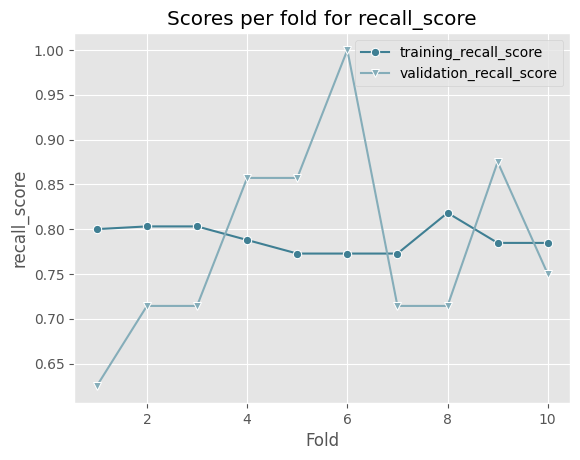

Successfully registered model 'logistic_regression_not_scaled_model'.
Created version '1' of model 'logistic_regression_not_scaled_model'.


In [283]:
# The best parameters found after grid search are added to the model.

best_hyperparams_lr =  {'C': 0.005, 'class_weight': 'balanced', 'penalty': 'l2'}

lr = LogisticRegression(**best_hyperparams_lr, random_state=22)
with mlflow.start_run(run_name="Logistic Regression Not Scaled Model: Metric = recall"):
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    lr_model, lr_final_test_recall_score, lr_recall_scores_df, lr_y_pred_test = train_and_evaluate_model(lr, X_train, y_train, X_test, y_test, recall_score, skf, plot=True)
    
    # Log model metrics
    mlflow.log_params(best_hyperparams_lr)
    mlflow.log_metric("final_test_recall_score", lr_final_test_recall_score)
    
    # Log the model
    model_path = "logistic_regression_not_scaled_model"
    mlflow.sklearn.log_model(lr, model_path)
    
    # Register the model in the Model Registry
    mlflow.register_model(model_uri=f"runs:/{mlflow.active_run().info.run_id}/{model_path}", name="logistic_regression_not_scaled_model")
    
    # Log artifacts
    lr_recall_scores_df.to_csv("mlflow_model_csv_data/lr_not_scaled_recall_scores.csv", index=False)
    mlflow.log_artifact("mlflow_model_csv_data/lr_not_scaled_recall_scores.csv")


**Model Training and Evaluation with Scaling**

- Average **training_recall_score** result: 0.88
- Average **validation_recall_score** result: 0.89
- Final **test_recall_score** result: 0.90
- Percentage difference between **validation score** and **training score**: +1.44%
- Percentage difference between **final score** and **training score**: +2.66%
- Confusion matrix created for the final test set:
  - [[21  5]
     [ 1  9]]
  - In the confusion matrix, only 1 person was classified as FN (false negative), while TP = 9 people were correctly classified as heart disease patients. The model has produced results suitable for the goal.
  - The values mentioned above were created without adding new features to the data.

**Evaluation Metric `recall`**

Fold 1 training_recall_score: 0.91
Fold 1 validation_recall_score: 0.88
Fold 2 training_recall_score: 0.85
Fold 2 validation_recall_score: 1.00
Fold 3 training_recall_score: 0.88
Fold 3 validation_recall_score: 0.71
Fold 4 training_recall_score: 0.88
Fold 4 validation_recall_score: 0.86
Fold 5 training_recall_score: 0.85
Fold 5 validation_recall_score: 1.00
Fold 6 training_recall_score: 0.86
Fold 6 validation_recall_score: 0.86
Fold 7 training_recall_score: 0.89
Fold 7 validation_recall_score: 0.86
Fold 8 training_recall_score: 0.88
Fold 8 validation_recall_score: 0.86
Fold 9 training_recall_score: 0.88
Fold 9 validation_recall_score: 1.00
Fold 10 training_recall_score: 0.86
Fold 10 validation_recall_score: 0.75
Cross-validation phase completed! Starting model training...
*******************************************
Model training completed!
*******************************************
Average training_recall_score score: 0.87
Average validation_recall_score score: 0.88
Final test_recall

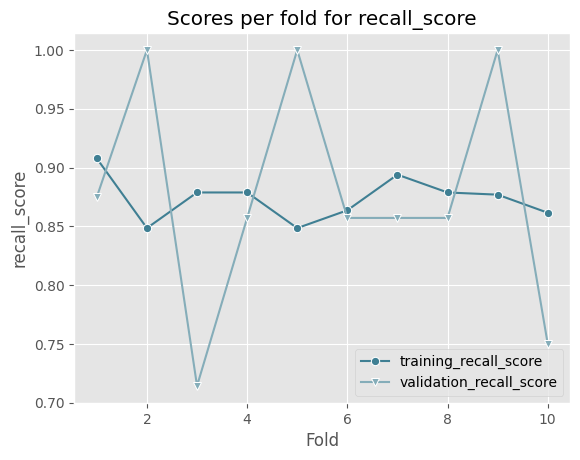

Registered model 'logistic_regression_scaled_model' already exists. Creating a new version of this model...
Created version '2' of model 'logistic_regression_scaled_model'.


In [285]:
# The best parameters found after grid search are added to the model.
lr = LogisticRegression(**best_hyperparams_lr, random_state=22)

lr_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", lr)
])

with mlflow.start_run(run_name="Logistic Regression Scaled Model: Metric = recall"):
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    lr_model, lr_final_test_recall_score, lr_recall_scores_df, lr_y_pred_test = train_and_evaluate_model(lr_pipeline, X_train, y_train, X_test, y_test, recall_score, skf, plot=True)
    
    # Log model metrics
    mlflow.log_params(best_hyperparams_lr)
    mlflow.log_metric("final_test_recall_score", lr_final_test_recall_score)
    
    # Log the model
    model_path = "logistic_regression_scaled_model"
    mlflow.sklearn.log_model(lr_pipeline, model_path)
    
    # Register the model in the Model Registry
    mlflow.register_model(model_uri=f"runs:/{mlflow.active_run().info.run_id}/{model_path}", name="logistic_regression_scaled_model")
    
    # Log artifacts
    lr_recall_scores_df.to_csv("mlflow_model_csv_data/lr_scaled_recall_scores.csv", index=False)
    mlflow.log_artifact("mlflow_model_csv_data/lr_scaled_recall_scores.csv")


**Evaluation Metric  `roc_auc_score`**

Fold 1 training_roc_auc_score: 0.88
Fold 1 validation_roc_auc_score: 0.83
Fold 2 training_roc_auc_score: 0.84
Fold 2 validation_roc_auc_score: 0.92
Fold 3 training_roc_auc_score: 0.87
Fold 3 validation_roc_auc_score: 0.73
Fold 4 training_roc_auc_score: 0.86
Fold 4 validation_roc_auc_score: 0.88
Fold 5 training_roc_auc_score: 0.84
Fold 5 validation_roc_auc_score: 0.95
Fold 6 training_roc_auc_score: 0.85
Fold 6 validation_roc_auc_score: 0.88
Fold 7 training_roc_auc_score: 0.88
Fold 7 validation_roc_auc_score: 0.72
Fold 8 training_roc_auc_score: 0.86
Fold 8 validation_roc_auc_score: 0.88
Fold 9 training_roc_auc_score: 0.86
Fold 9 validation_roc_auc_score: 0.94
Fold 10 training_roc_auc_score: 0.85
Fold 10 validation_roc_auc_score: 0.88
Cross-validation phase completed! Starting model training...
*******************************************
Model training completed!
*******************************************
Average training_roc_auc_score score: 0.86
Average validation_roc_auc_score score: 

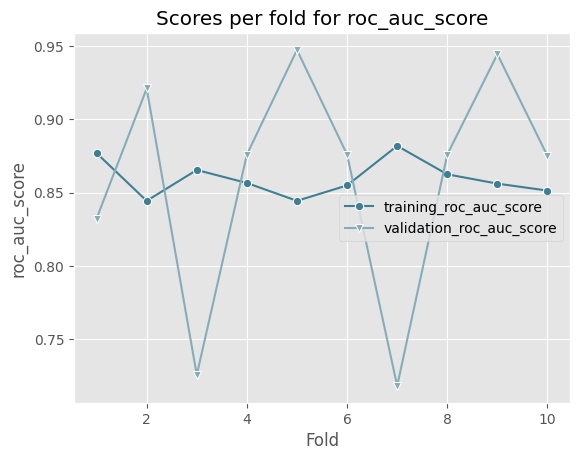

Successfully registered model 'logistic_regression_scaled_model_roc_auc_score'.
Created version '1' of model 'logistic_regression_scaled_model_roc_auc_score'.


In [286]:
# The best parameters found after grid search are added to the model.

lr_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", lr)
])

with mlflow.start_run(run_name="Logistic Regression Scaled Model: Metric = roc_auc_score"):
    
    lr_model, lr_final_test_roc_auc_score, lr_roc_auc_score_df, lr_y_pred_test = train_and_evaluate_model(lr_pipeline, X_train, y_train, X_test, y_test, roc_auc_score, skf, plot=True)
    
    # Log model metrics
    mlflow.log_params(best_hyperparams_lr)
    mlflow.log_metric("final_test_roc_auc_score", lr_final_test_roc_auc_score)
    
    # Log the model
    model_path = "logistic_regression_scaled_model_roc_auc_score"
    mlflow.sklearn.log_model(lr_pipeline, model_path)
    
    # Register the model in the Model Registry
    mlflow.register_model(model_uri=f"runs:/{mlflow.active_run().info.run_id}/{model_path}", name="logistic_regression_scaled_model_roc_auc_score")
    
    # Log artifacts
    lr_roc_auc_score_df.to_csv("mlflow_model_csv_data/lr_scaled_roc_auc_scores.csv", index=False)
    mlflow.log_artifact("mlflow_model_csv_data/lr_scaled_roc_auc_scores.csv")


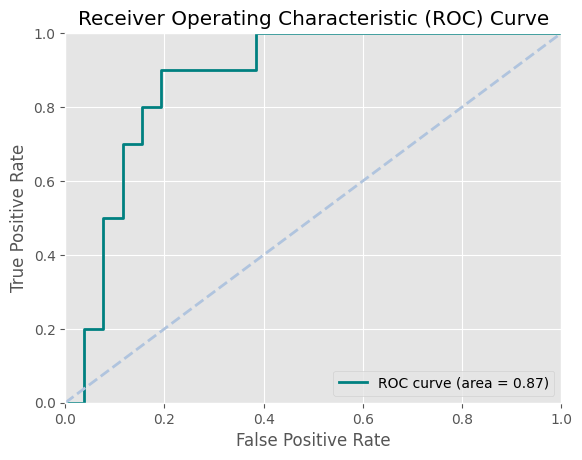

In [287]:
plot_roc_curve(y_test,lr_y_pred_test)

**Logistic Regression Feature Importances Table**

- The weightings of the model's features are shown in the table.
- High positive weights are given to the features **exercise_induced_angina**, **number_major_vessels**, and **st_depression_induced_by_exercise**. 
- A high negative weight is assigned to the feature **the normal**.


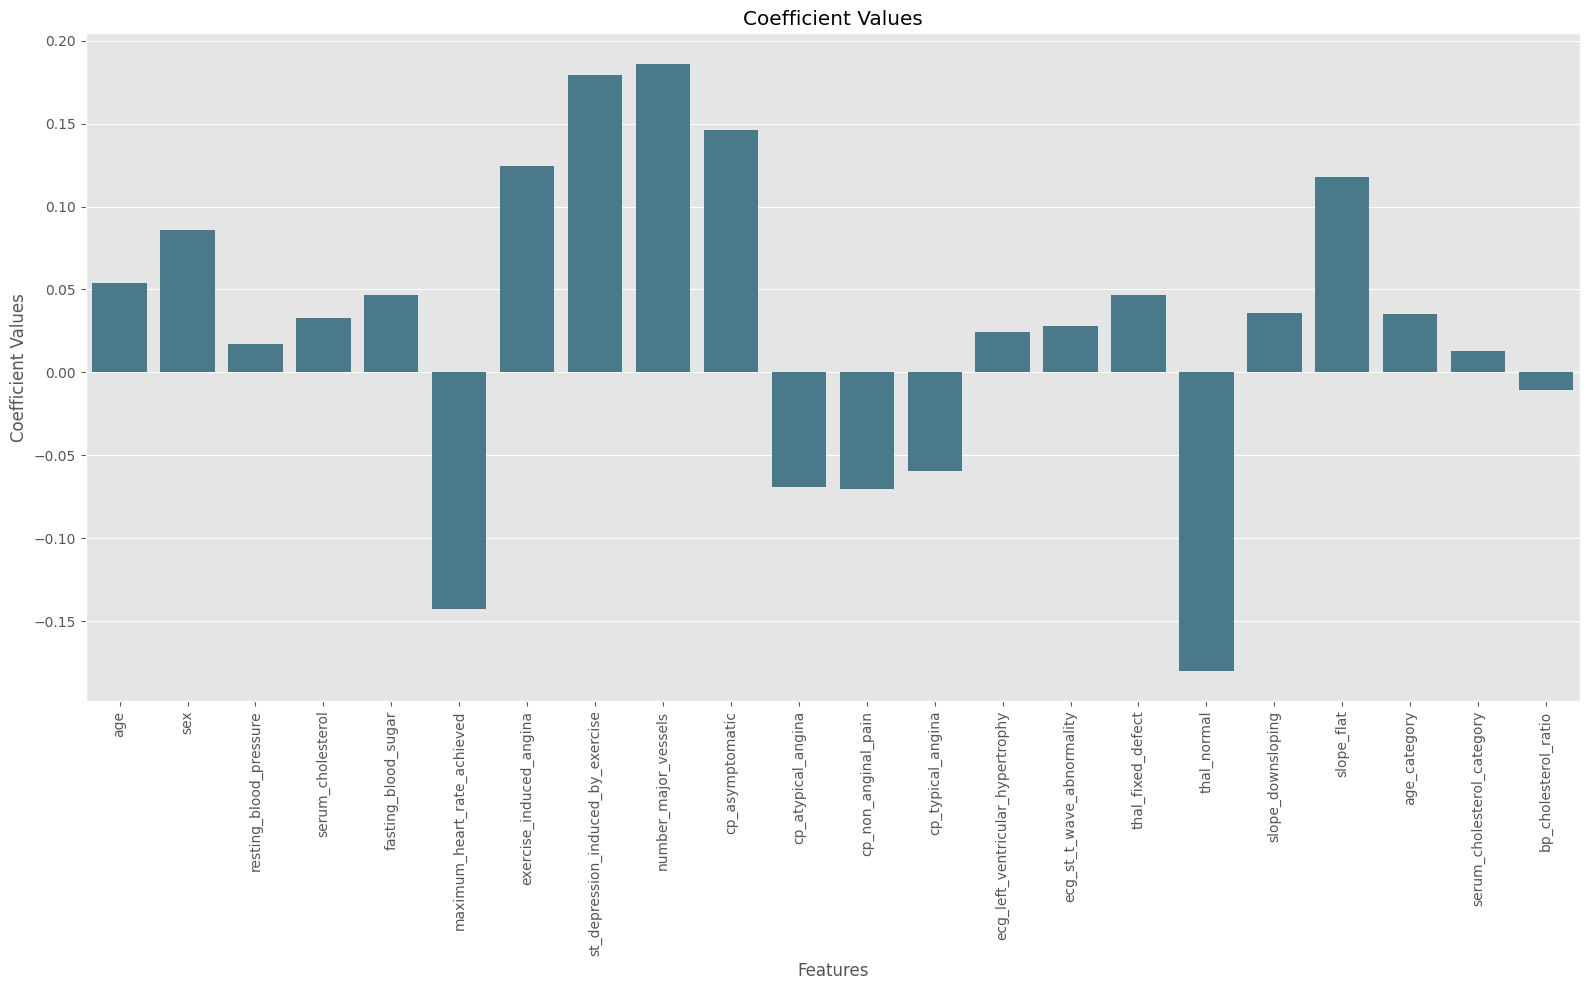

In [288]:
coef_values = lr_model.named_steps["classifier"].coef_[0]
columns = X_train.columns

plt.figure(figsize=(16, 10))
sns.barplot(x=columns, y=coef_values)
plt.xlabel("Features")
plt.ylabel("Coefficient Values")
plt.title("Coefficient Values")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Random Forest Classifier Model**

Tree-based models are naturally capable of handling class imbalance and skewed features. They do not require scaling, but since scaling can still be useful, the model was scaled using **StandardScaler**.

- The best parameters were determined using **GridSearch**:
  - `'class_weight': 'balanced'`
  - `'max_depth': 2`
  - `'max_features': 0.5`
  - `'min_samples_leaf': 1`
  - `'min_samples_split': 2`
  - `'n_estimators': 200`

### Explanation of Parameters:

- **n_estimators**: The number of decision trees in the forest. Increasing the number of trees makes the model more complex and increases training time. While this can improve performance, it also raises the risk of overfitting.
  
- **max_depth**: The maximum depth of each decision tree. Deeper trees allow for more complex models, but also increase the risk of overfitting.
  
- **min_samples_split**: The minimum number of samples required to split an internal node. Smaller values can lead to more trees and more complex models.
  
- **min_samples_leaf**: The minimum number of samples required in a leaf node. Smaller values lead to more complex models.
  
- **max_features**: The maximum number of features to consider when splitting a decision tree. Larger values increase the complexity of the model by allowing more features to be considered.

- **class_weight**: Used to handle class imbalances. The **'balanced'** option assigns weights inversely proportional to class frequencies, which helps improve performance on imbalanced datasets.


**Random Forest Classifier Hyperparameter Tuning**

- Due to the small size of the dataset, **GridSearch** was used for hyperparameter tuning. This method performs brute force by trying all possible combinations of the hyperparameters.
  
- When the dataset and the number of parameters increase, this method may become impractical due to long processing times. In such cases, alternative techniques like **Random Search** or **Bayesian Optimization** can be used to explore the hyperparameter space more efficiently.

- The hyperparameter tuning process took **1 hour**.


In [ ]:
# skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
# scoring = make_scorer(recall_score) 
# rf_cv = RandomForestClassifier()

# rf_pipeline_cv = Pipeline([
#     ("scaler", StandardScaler()),
#     ("classifier", rf_cv)
# ])

# params_rf = {
#     "classifier__n_estimators": [ 100, 150, 200, 250, 300],
#     "classifier__max_depth": [None, 2, 4, 6, 8, 12],
#     "classifier__min_samples_split": [1, 2, 5, 10],
#     "classifier__min_samples_leaf": [1, 2, 4, 8],
#     "classifier__max_features": [0.3, 0.5, 0.7, 1],
#     "classifier__class_weight": ["balanced"]
# }

# with mlflow.start_run(run_name="RandomForestClassifier_Grid_Search"):

#     grid_rf = GridSearchCV(estimator=rf_pipeline_cv, param_grid=params_rf, cv=skf, scoring=scoring, verbose=1, n_jobs=1)
#     grid_rf.fit(X,y)
#     best_hyperparams_rf = grid_rf.best_params_
#     best_score_rf = grid_rf.best_score_
#     print("Best hyperparameters of RandomForestClassifier:", best_hyperparams_rf)
#     print("Best score(recall) of RandomForestClassifier:", best_score_rf)
    
#     mlflow.log_params(best_hyperparams_rf)
#     mlflow.log_metric("lr_best_recall_score", best_score_rf)

```
Fitting 10 folds for each of 1920 candidates, totaling 19200 fits
Best hyperparameters for RandomForestClassifier: {'classifier__class_weight': 'balanced', 'classifier__max_depth': 2, 'classifier__max_features': 0.3, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best score (recall) for RandomForestClassifier: 0.8902777777777778
```

**Model Training and Evaluation**

- **Average Training Recall Score**: 0.92
- **Average Validation Recall Score**: 0.86
- **Final Test Recall Score**: 0.90
- **Difference in Validation Score vs. Training Score**: -%5.87
- **Difference in Final Score vs. Training Score**: -%1.78

**Confusion Matrix for Final Test Set**:
- [[21  5]  
- [ 1  9]]

- **Results**: The confusion matrix of the Random Forest model gives the same results as the Logistic Regression model: TP = 9 (correctly classified heart disease patients), FN = 1 (false negative, incorrectly classified heart disease patient).
  
- **Model Evaluation**: In the Random Forest model, validation and test errors are lower than training errors, which may indicate **underfitting** in the model.

- **Data Set**: As the dataset contains very few examples, increasing the dataset size is required to improve the model's general performance.

- **Note**: The values presented here were generated without adding new features to the data.


**Evaluation Metric: `recall_score`**

- The non-scaled version of the model (RandomForestClassifier) will not be evaluated.


Fold 1 training_recall_score: 0.92
Fold 1 validation_recall_score: 1.00
Fold 2 training_recall_score: 0.92
Fold 2 validation_recall_score: 1.00
Fold 3 training_recall_score: 0.92
Fold 3 validation_recall_score: 1.00
Fold 4 training_recall_score: 0.92
Fold 4 validation_recall_score: 0.86
Fold 5 training_recall_score: 0.92
Fold 5 validation_recall_score: 0.71
Fold 6 training_recall_score: 0.92
Fold 6 validation_recall_score: 0.86
Fold 7 training_recall_score: 0.97
Fold 7 validation_recall_score: 0.71
Fold 8 training_recall_score: 0.94
Fold 8 validation_recall_score: 0.71
Fold 9 training_recall_score: 0.94
Fold 9 validation_recall_score: 0.88
Fold 10 training_recall_score: 0.92
Fold 10 validation_recall_score: 0.75
Cross-validation phase completed! Starting model training...
*******************************************
Model training completed!
*******************************************
Average training_recall_score score: 0.93
Average validation_recall_score score: 0.85
Final test_recall

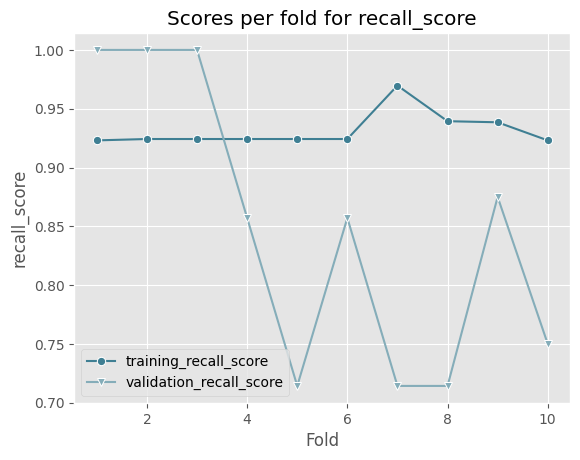

Successfully registered model 'RandomForestClassifier_scaled_model_recall'.
Created version '1' of model 'RandomForestClassifier_scaled_model_recall'.


In [290]:
best_hyperparams_rf =  {'class_weight': 'balanced', 'max_depth': 2, 'max_features': 0.3, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
rf = RandomForestClassifier(**best_hyperparams_rf, random_state=22)

rf_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", rf)
])

with mlflow.start_run(run_name="RandomForestClassifier Scaled Model: Metric = recall"):
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    rf_model, rf_final_test_recall_score, rf_recall_scores_df, rf_y_pred_test = train_and_evaluate_model(rf_pipeline, X_train, y_train, X_test, y_test, recall_score, skf, plot=True)
    
    # Log model metrics
    mlflow.log_metric("RandomForestClassifier_final_test_recall_score", rf_final_test_recall_score)
    mlflow.log_params(best_hyperparams_rf)
    
    # Log the model
    model_path = "RandomForestClassifier_scaled_model_recall_score"
    mlflow.sklearn.log_model(rf_pipeline, model_path)
    
    # Register the model in the Model Registry
    mlflow.register_model(model_uri=f"runs:/{mlflow.active_run().info.run_id}/{model_path}", name="RandomForestClassifier_scaled_model_recall")
    
    # Log artifacts
    rf_recall_scores_df.to_csv("mlflow_model_csv_data/rf_scaled_recall_scores.csv", index=False)
    mlflow.log_artifact("mlflow_model_csv_data/rf_scaled_recall_scores.csv")


**Evaluation Metric `roc_auc_score`**

Fold 1 training_roc_auc_score: 0.88
Fold 1 validation_roc_auc_score: 0.87
Fold 2 training_roc_auc_score: 0.90
Fold 2 validation_roc_auc_score: 0.92
Fold 3 training_roc_auc_score: 0.91
Fold 3 validation_roc_auc_score: 0.89
Fold 4 training_roc_auc_score: 0.89
Fold 4 validation_roc_auc_score: 0.88
Fold 5 training_roc_auc_score: 0.88
Fold 5 validation_roc_auc_score: 0.83
Fold 6 training_roc_auc_score: 0.89
Fold 6 validation_roc_auc_score: 0.88
Fold 7 training_roc_auc_score: 0.93
Fold 7 validation_roc_auc_score: 0.65
Fold 8 training_roc_auc_score: 0.89
Fold 8 validation_roc_auc_score: 0.80
Fold 9 training_roc_auc_score: 0.90
Fold 9 validation_roc_auc_score: 0.88
Fold 10 training_roc_auc_score: 0.90
Fold 10 validation_roc_auc_score: 0.88
Cross-validation phase completed! Starting model training...
*******************************************
Model training completed!
*******************************************
Average training_roc_auc_score score: 0.90
Average validation_roc_auc_score score: 

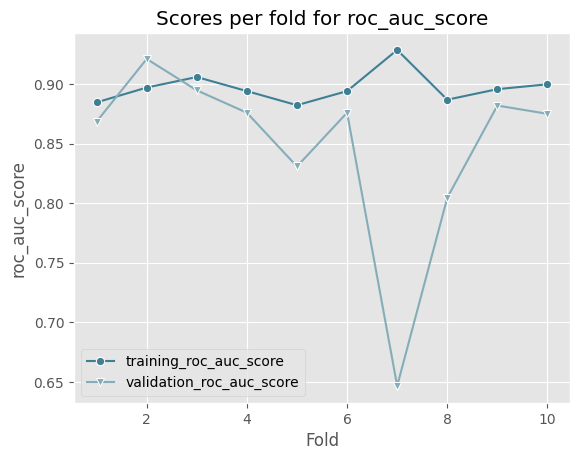

Successfully registered model 'RandomForestClassifier_scaled_model_roc_auc'.
Created version '1' of model 'RandomForestClassifier_scaled_model_roc_auc'.


In [291]:
rf_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", rf)
])

with mlflow.start_run(run_name="RandomForestClassifier Scaled Model: Metric = roc_auc_score"):
    rf_model, rf_final_test_roc_auc_score, rf_roc_auc_scores_df, rf_y_pred_test = train_and_evaluate_model(rf_pipeline, X_train, y_train, X_test, y_test, roc_auc_score, skf, plot=True)
    
    # Log model metrics
    mlflow.log_metric("RandomForestClassifier_final_test_roc_auc_score", rf_final_test_roc_auc_score)
    mlflow.log_params(best_hyperparams_rf)
    
    # Log the model
    model_path = "RandomForestClassifier_scaled_model_roc_auc_score"
    mlflow.sklearn.log_model(rf_pipeline, model_path)
    
    # Register the model in the Model Registry
    mlflow.register_model(model_uri=f"runs:/{mlflow.active_run().info.run_id}/{model_path}", name="RandomForestClassifier_scaled_model_roc_auc")
    
    # Log artifacts
    rf_roc_auc_scores_df.to_csv("mlflow_model_csv_data/rf_scaled_roc_auc_scores.csv", index=False)
    mlflow.log_artifact("mlflow_model_csv_data/rf_scaled_roc_auc_scores.csv")


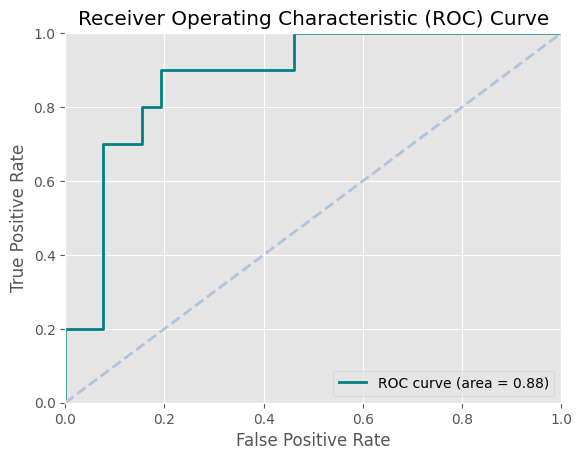

In [292]:
plot_roc_curve(y_test,rf_y_pred_test)

**RandomForestClassifier Feature Importances Table**

- The feature importance weights of the model are presented in the table.  
- The Random Forest Classifier model assigns high importance to the features `maximum_heart_rate_achieved`, `st_depression_induced_by_exercise`, `number_major_vessels`, and `the_normal`.


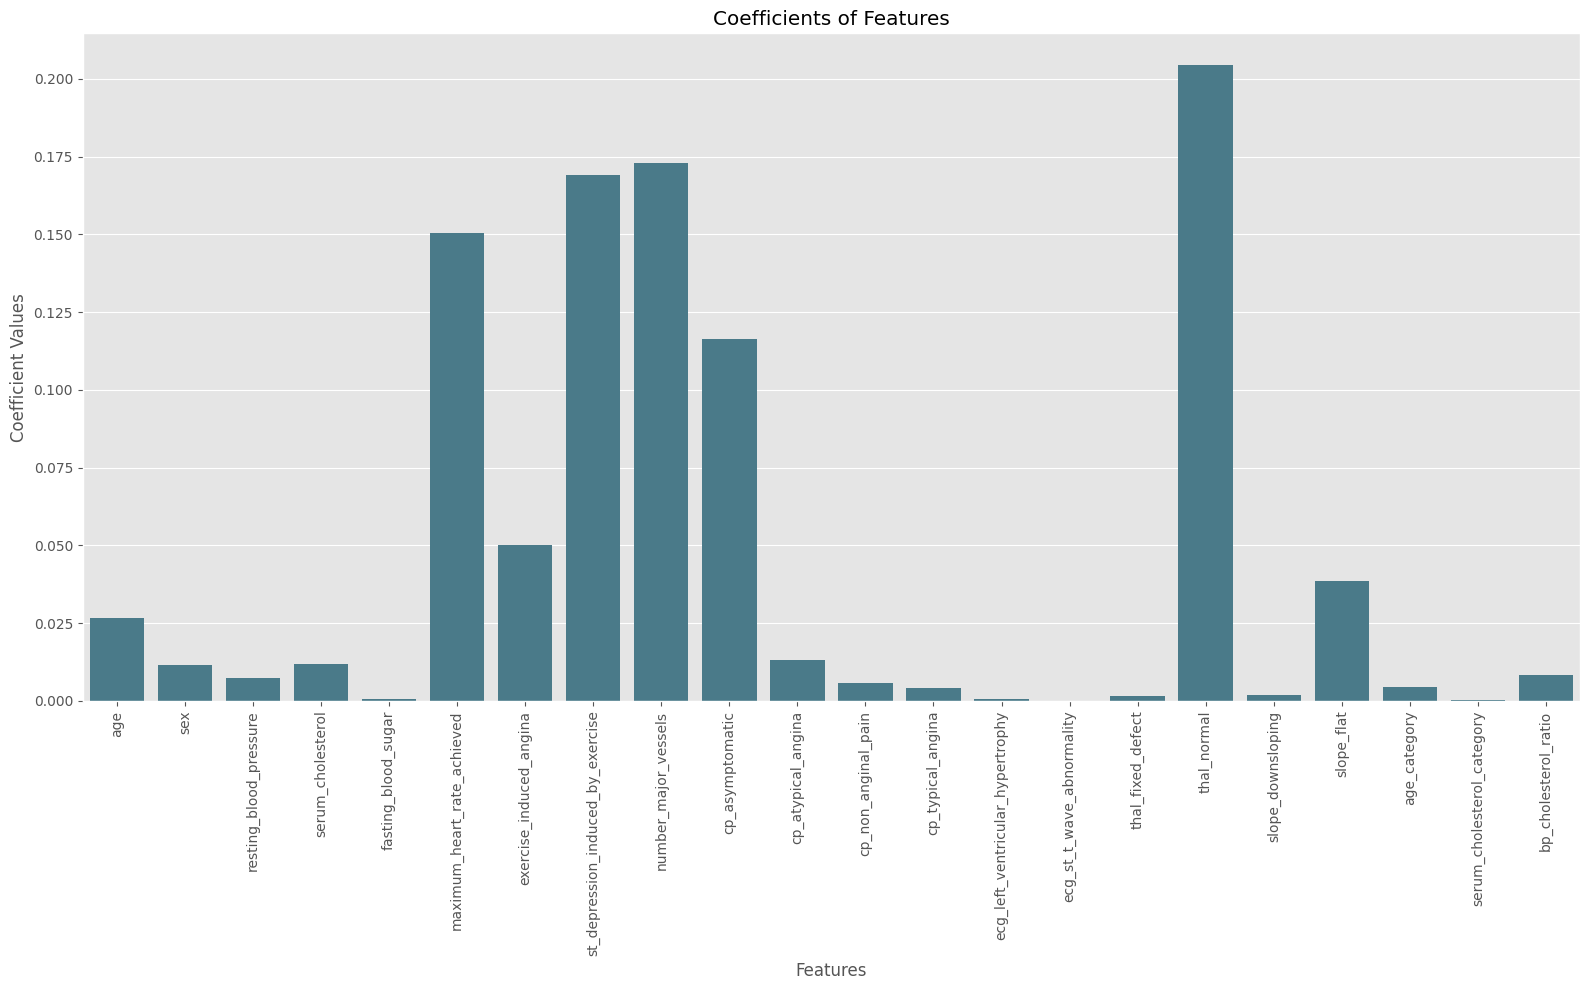

In [293]:
feature_importances = rf_model.named_steps["classifier"].feature_importances_

columns = X_train.columns
plt.figure(figsize=(16, 10))
sns.barplot(x=columns, y=feature_importances)
plt.xlabel("Features")
plt.ylabel("Coefficient Values")
plt.title("Coefficients of Features")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Model Selection Outcome**

Detecting individuals at risk of heart disease is of critical importance. In this process, ensuring that a person with heart disease is not mistakenly classified as healthy is vital. For this reason, the `recall` metric was chosen as the primary evaluation measure.  
Additionally, a secondary evaluation was performed using `roc_auc_score` to measure how well the model separates the classes.

As a result, model selection was based on two performance metrics: `recall` and `roc_auc_score`.

The `recall` and `roc_auc_score` values achieved by the Logistic Regression and Random Forest models are shown below.

Both models demonstrated similar performance. However, the **Random Forest Classifier** was chosen as the final model due to its built-in feature selection capability


**Comparison of Model Performance Metrics**

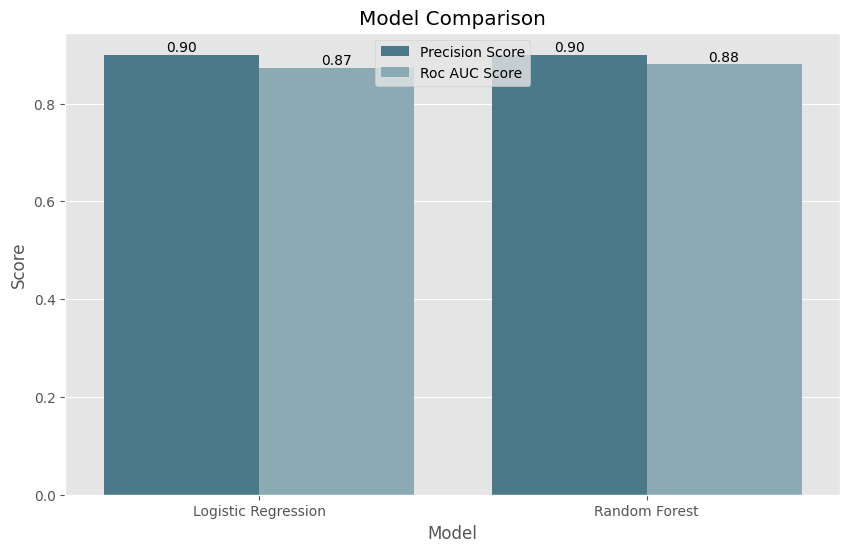

In [294]:
scores_data = {
    "Model": ["Logistic Regression"] * 2 + ["Random Forest"] * 2,
    "Metric": ["Precision Score", "Roc AUC Score"] * 2,
    "Score": [lr_final_test_recall_score, lr_final_test_roc_auc_score, rf_final_test_recall_score, rf_final_test_roc_auc_score]
}
scores_df = pd.DataFrame(scores_data)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Model", y="Score", hue="Metric", data=scores_df)
for container in ax.containers:
    ax.bar_label(container, fmt='%0.2f', label_type="edge")
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xlabel("Model")
plt.legend(loc="upper center")
plt.show()

**Comparison of Features Selected by the Models**

The chart below visualizes the feature importance scores of both Logistic Regression and Random Forest Classifier models, scaled to the same range for direct comparison.

**Key Observations:**
1. **Scaling**: Feature importance values from both models are normalized to allow a fair comparison on a single chart.  
2. **Negativity in Logistic Regression**: Logistic Regression assigns both positive and negative weights to features, reflecting their influence direction. On the other hand, Random Forest Classifier does not assign negative importance to any feature, as its approach differs.  
3. **Similarity in Feature Selection**: Despite differences in their mechanisms, both models tend to prioritize similar features. This consistency reinforces the reliability of the selected features.

The comparison demonstrates that both models align in identifying the most relevant features for predicting heart disease, enhancing confidence in the feature engineering and selection process.


In [295]:
feature_dict = {"Features":X_train.columns,"Logistic Regression Features": coef_values, "RandomforestClassifier Features": feature_importances}
models_features_df = pd.DataFrame(feature_dict)
models_features_df.set_index("Features",inplace=True)

scaler = MinMaxScaler()
models_features_df_scaled =scaler.fit_transform(models_features_df)
df_scaled_features = pd.DataFrame(models_features_df_scaled, columns=models_features_df.columns, index=models_features_df.index)

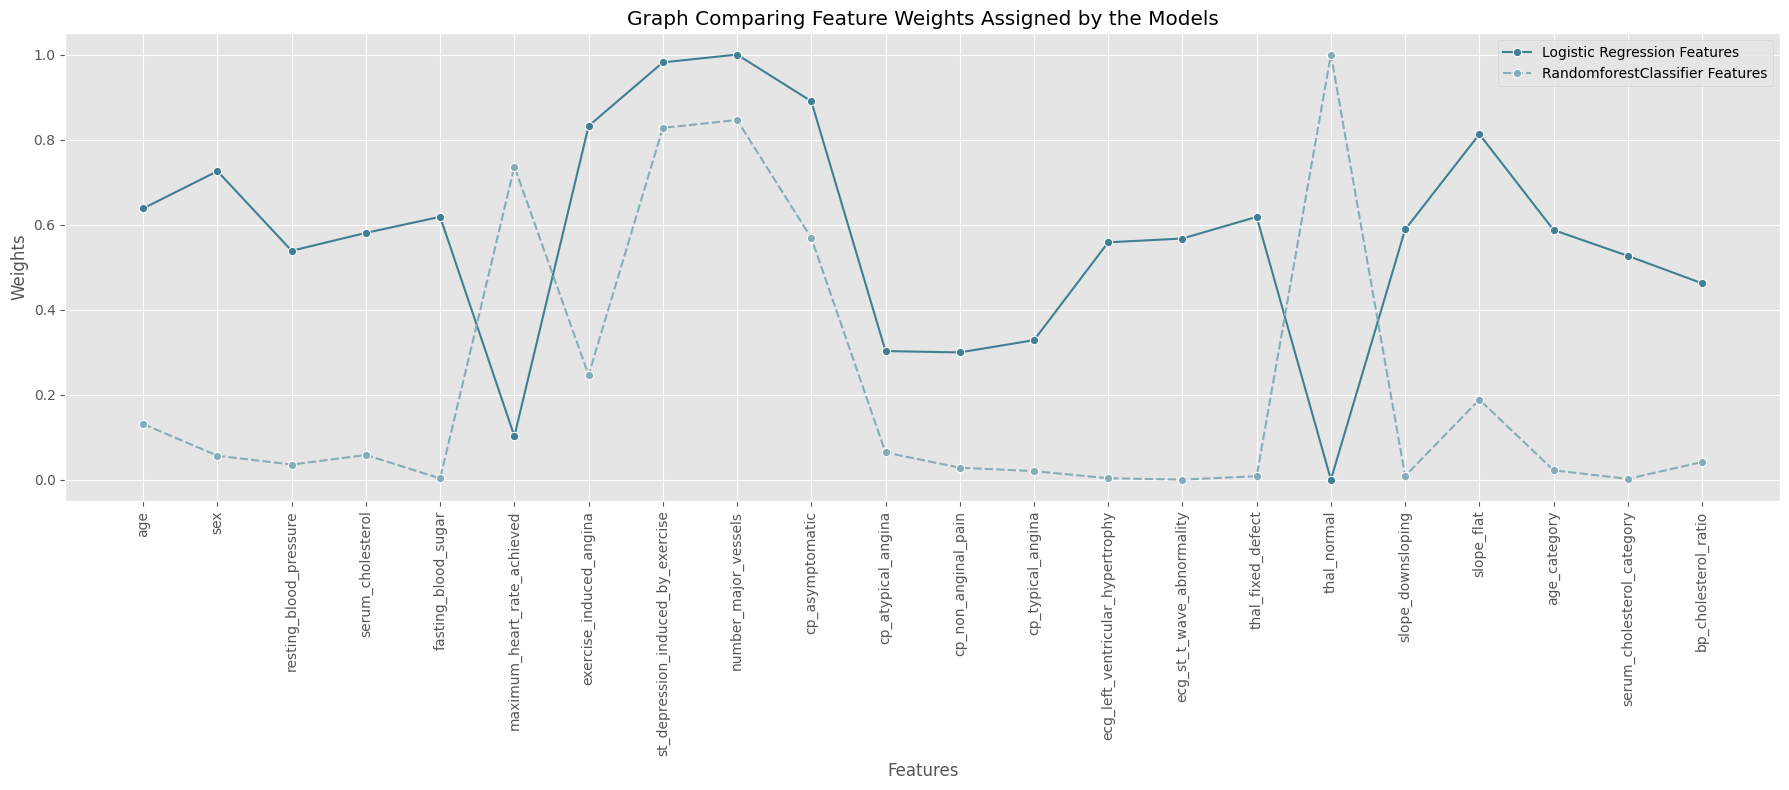

In [296]:
plt.figure(figsize=(18, 8))
sns.lineplot(df_scaled_features, markers="o")
plt.title("Graph Comparing Feature Weights Assigned by the Models")
plt.xlabel("Features")
plt.ylabel("Weights")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# MODEL PIPELINE CREATION AND DEPLOYMENT:

- **Pipeline Construction**:  
  All preprocessing and modeling steps applied to the dataset have been encapsulated in an `sklearn` pipeline. This is essential because real-world data often comes in raw form, and a pipeline ensures a consistent and repeatable process for handling such data. Each step in the pipeline inherits from the `BaseEstimator` class of `sklearn`, creating a modular and maintainable structure.

- **Model Saving**:  
  The finalized model, including all preprocessing steps, has been saved using `mlflow`. This allows for easy tracking, versioning, and deployment of the model.

- **Frontend and Backend Integration**:  
  The project has been transformed into a deployable application using the **Gradio** and **FastAPI** libraries.  
  - **Gradio** provides an intuitive frontend for user interaction, making it easy to visualize and test the model.  
  - **FastAPI** handles backend processes, enabling efficient and scalable deployment of the model.


In [ ]:

class OutlierReplacer(BaseEstimator, TransformerMixin):
    def __init__(self, variables):
        self.variables = variables

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for variable in self.variables:
            low_limit, up_limit = self.outlier_thresholds(X, variable)
            X.loc[(X[variable] > up_limit), variable] = up_limit
            if X[variable].min() > 0:
                X.loc[(X[variable] < low_limit), variable] = low_limit
        return X

    def outlier_thresholds(self, X, variable, q1_thr=0.25, q3_thr=0.75):
        quartile1 = X[variable].quantile(q1_thr)
        quartile3 = X[variable].quantile(q3_thr)
        interquantile_range = quartile3 - quartile1
        up_limit = quartile3 + 1.5 * interquantile_range
        low_limit = quartile1 - 1.5 * interquantile_range
        return low_limit, up_limit

 
class FeatureGenerator(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = X.copy()

        age_bins = [-np.inf, 18, 40, 60, np.inf]
        age_labels = [0, 1, 2, 3]
        X['age_category'] = pd.cut(X['age'], bins=age_bins, labels=age_labels)
        
        mhr_bins = [-np.inf, 100, 200, 300, np.inf]
        mhr_labels = [0, 1, 2, 3]
        X['serum_cholesterol_category'] = pd.cut(X['serum_cholesterol'], bins=mhr_bins, labels=mhr_labels)
        
        X['bp_cholesterol_ratio'] = X['resting_blood_pressure'] / X['serum_cholesterol']
        
        return X


class CorrelationFilter(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.85):
        self.threshold = threshold
    
    def fit(self, X, y=None):

        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
        elif not isinstance(X, pd.DataFrame):
            raise ValueError("X, must be Pandas DataFrame.")
        
        corr_matrix = X.corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        self.to_drop = [column for column in upper.columns if any(upper[column] > self.threshold)]
        return self
    
    def transform(self, X, y=None):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
        elif not isinstance(X, pd.DataFrame):
            raise ValueError("X, must be Pandas DataFrame.")
        
        return X.drop(columns=self.to_drop, errors='ignore')
    
    
one_hot_cat_features = ["chest_pain_type", "resting_ecg_results", "thal","slope_peak_exercise_st_segment"]
ordinal_age_cat_features = ["age_category"]
ordinal_serum_cat_features = ["serum_cholesterol_category"]
numerical_features = ["age", "resting_blood_pressure", "serum_cholesterol", "maximum_heart_rate_achieved", "st_depression_induced_by_exercise", "number_major_vessels","bp_cholesterol_ratio"]
outlier_features = ["age", "resting_blood_pressure", "serum_cholesterol", "maximum_heart_rate_achieved", "st_depression_induced_by_exercise"]

one_hot_cat_transformer = OneHotEncoder()
ordinal_cat_trainsformer = OrdinalEncoder(categories=[[0, 1, 2, 3]])
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat_ohe', one_hot_cat_transformer, one_hot_cat_features),
        ('age_cat_ord', ordinal_cat_trainsformer, ordinal_serum_cat_features),
        ('serum_cat_ord', ordinal_cat_trainsformer, ordinal_serum_cat_features),
    ],
    remainder='passthrough' 
)

pipeline = Pipeline(steps=[
    ('outlier_replacer', OutlierReplacer(variables=outlier_features)),
    ('feature_generator', FeatureGenerator()),
    ('preprocessor', preprocessor),
    ('correlation_filter', CorrelationFilter(threshold=0.82)),
    ('classifier', RandomForestClassifier(**best_hyperparams_rf,random_state=22))
])


def train_and_log_model(X, y):
    with mlflow.start_run(run_name="RandomForestClassifier Production Model: Metric = recall"):
        pipeline.fit(X, y)
        model_path = "final_rf_model"
        mlflow.log_params(best_hyperparams_rf)
        mlflow.sklearn.log_model(pipeline, model_path)
        mlflow.register_model(model_uri=f"runs:/{mlflow.active_run().info.run_id}/{model_path}", name=model_path)
        

In [298]:
pipeline[-1]

RandomForestClassifier(class_weight='balanced', max_depth=2, max_features=0.3,
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200, random_state=22)

In [299]:
df = pd.read_csv("raw_heart_disease_data.csv")
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_ecg_results,maximum_heart_rate_achieved,exercise_induced_angina,st_depression_induced_by_exercise,slope_peak_exercise_st_segment,number_major_vessels,thal,presence_of_heart_disease
0,63,1,cp_typical_angina,145,233,1,ecg_left_ventricular_hypertrophy,150,0,2.3,slope_downsloping,0.0,thal_fixed_defect,0
1,67,1,cp_asymptomatic,160,286,0,ecg_left_ventricular_hypertrophy,108,1,1.5,slope_flat,3.0,thal_normal,1
2,67,1,cp_asymptomatic,120,229,0,ecg_left_ventricular_hypertrophy,129,1,2.6,slope_flat,2.0,thal_reversable_defect,0
3,37,1,cp_non_anginal_pain,130,250,0,ecg_normal,187,0,3.5,slope_downsloping,0.0,thal_normal,0
4,41,0,cp_atypical_angina,130,204,0,ecg_left_ventricular_hypertrophy,172,0,1.4,slope_upsloping,0.0,thal_normal,0


- **Initial Manual Data Cleaning**:

In [300]:
df.dropna(inplace=True)

In [301]:
target = "presence_of_heart_disease"
X = df.drop(target, axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12,stratify=y, random_state=42)

In [302]:
train_and_log_model(X_train, y_train)

Successfully registered model 'final_rf_model'.
Created version '1' of model 'final_rf_model'.


**Verification of Applied Changes**  
- It has been verified that outlier analysis has been conducted and new features have been added to the dataset.

In [303]:
low_limit, up_limit = outlier_thresholds(X_train, "resting_blood_pressure")
show_outliers(X_train,"resting_blood_pressure", low_limit, up_limit)


low_limit: 90.0, up_limit: 170.0
There are 9 outliers in the dataset.


,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_ecg_results,maximum_heart_rate_achieved,exercise_induced_angina,st_depression_induced_by_exercise,slope_peak_exercise_st_segment,number_major_vessels,thal
201,64,0,cp_asymptomatic,180,325,0,ecg_normal,154,1,0.0,slope_upsloping,0.0,thal_normal
126,56,0,cp_asymptomatic,200,288,1,ecg_left_ventricular_hypertrophy,133,1,4.0,slope_downsloping,2.0,thal_reversable_defect
231,55,0,cp_asymptomatic,180,327,0,ecg_st_t_wave_abnormality,117,1,3.4,slope_flat,0.0,thal_normal
183,59,1,cp_typical_angina,178,270,0,ecg_left_ventricular_hypertrophy,145,0,4.2,slope_downsloping,0.0,thal_reversable_defect
172,59,0,cp_asymptomatic,174,249,0,ecg_normal,143,1,0.0,slope_flat,0.0,thal_normal


In [304]:
X_transformed = pipeline.named_steps['outlier_replacer'].transform(X_train)
X_transformed = pipeline.named_steps['feature_generator'].transform(X_transformed)
# X_transformed = pipeline.named_steps['preprocessor'].transform(X_transformed)
# X_transformed = pipeline.named_steps['correlation_filter'].transform(X_transformed)
low_limit, up_limit = outlier_thresholds(X_transformed, "resting_blood_pressure")
show_outliers(X_transformed,"resting_blood_pressure", low_limit, up_limit)

low_limit: 90.0, up_limit: 170.0
There are 0 outliers in the dataset.


,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_ecg_results,maximum_heart_rate_achieved,exercise_induced_angina,st_depression_induced_by_exercise,slope_peak_exercise_st_segment,number_major_vessels,thal,age_category,serum_cholesterol_category,bp_cholesterol_ratio


In [314]:
# Model loading for sklearn library
model_path = "models:/final_rf_model/1" 
model = mlflow.sklearn.load_model(model_path)

# Other load method
# model_path = "models:/final_rf_model/7" 
# model = mlflow.pyfunc.load_model(model_path)

In [315]:
y_pred_final = model.predict(X_test)
final_recall_core = recall_score(y_test, y_pred_final)
print(f"Test Recall: {final_recall_core:.4f}")

Test Recall: 0.9000


In [316]:
y_pred_prob_final = model.predict_proba(X_test)[:,1]
final_roc_auc_score = roc_auc_score(y_test, y_pred_prob_final)
print(f"Test roc_auc_score: {final_roc_auc_score}")

Test roc_auc_score: 0.8884615384615384


**Test prediction:**

In [317]:
sample_data1 = X_test.iloc[0:1]
sample_data2 = X_test.iloc[1:2]

In [318]:
sample_data1

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_ecg_results,maximum_heart_rate_achieved,exercise_induced_angina,st_depression_induced_by_exercise,slope_peak_exercise_st_segment,number_major_vessels,thal
143,64,1,cp_non_anginal_pain,125,309,0,ecg_normal,131,1,1.8,slope_flat,0.0,thal_reversable_defect


In [319]:
predicted_class = model.predict(sample_data1)
predicted_class

array([1], dtype=int64)

In [320]:
predicted_class = model.predict(sample_data2)
predicted_class

array([0], dtype=int64)

# CONCLUSION AND RECOMMENDATIONS

- **Increase Data Volume:** To improve model predictions, the amount of data should be increased. Larger datasets can lead to better generalization and higher accuracy.
- **Incorporate Expert Knowledge:** By conducting a medical literature review and consulting with expert doctors, additional relevant features can be identified and added to the model.
- **Perform Advanced Data Analysis:** After adding new features, tools like Power BI can be used to conduct more detailed data analysis, uncovering hidden relationships and potential new causes for heart conditions.
- **Enhance Code Management:** The pipeline structure can be modularized and saved into separate Python files. Tools like DVC and Hydra can be employed for better manageability, and CI/CD workflows can be automated with GitHub Actions or Jenkins.
- **Leverage Cloud Platforms:** The model can be deployed on cloud platforms. For instance, AWS services like VPC for network setup, EC2, S3, Lambda, API Gateway, DynamoDB, and SageMaker can be integrated for a fully automated cloud deployment.
- **Store Predictions:** Prediction outputs can be saved to a database for further analysis and tracking.
- **Monitor Model Performance:** Once the model is in production, its performance should be continuously monitored to detect issues like data drift, enabling timely updates and maintenance.
- **Professional Deployment:** For a polished product, a professional tech stack can be adopted. React or Vue.js can be used for the frontend, while Node.js or .NET can serve as backend frameworks for building a robust and user-friendly application.
